In [ ]:
!pip install statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
raw_df=pd.read_csv('traffic.csv')
raw_df.sample(5)
raw_df.describe()

Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10

In [ ]:
#Extracting features from Datetime
df=raw_df.copy()
df['DateTime']=pd.to_datetime(df['DateTime'])
# Extract year from DateTime
df['Year'],df['Month'],df['Day'],df['Hour'] = df['DateTime'].dt.year,df['DateTime'].dt.month,df['DateTime'].dt.day,df['DateTime'].dt.hour
# Drop the ID column
df = df.drop(columns=['ID'])


In [ ]:
df.sample(5)

DateTime  Junction  Vehicles  Year  Month  Day  Hour
17819 2016-03-14 11:00:00         2        15  2016      3   14    11
5073  2016-05-30 09:00:00         1        32  2016      5   30     9
38931 2016-12-11 03:00:00         3         5  2016     12   11     3
44763 2017-02-11 03:00:00         4         3  2017      2   11     3
12508 2017-04-05 04:00:00         1        41  2017      4    5     4

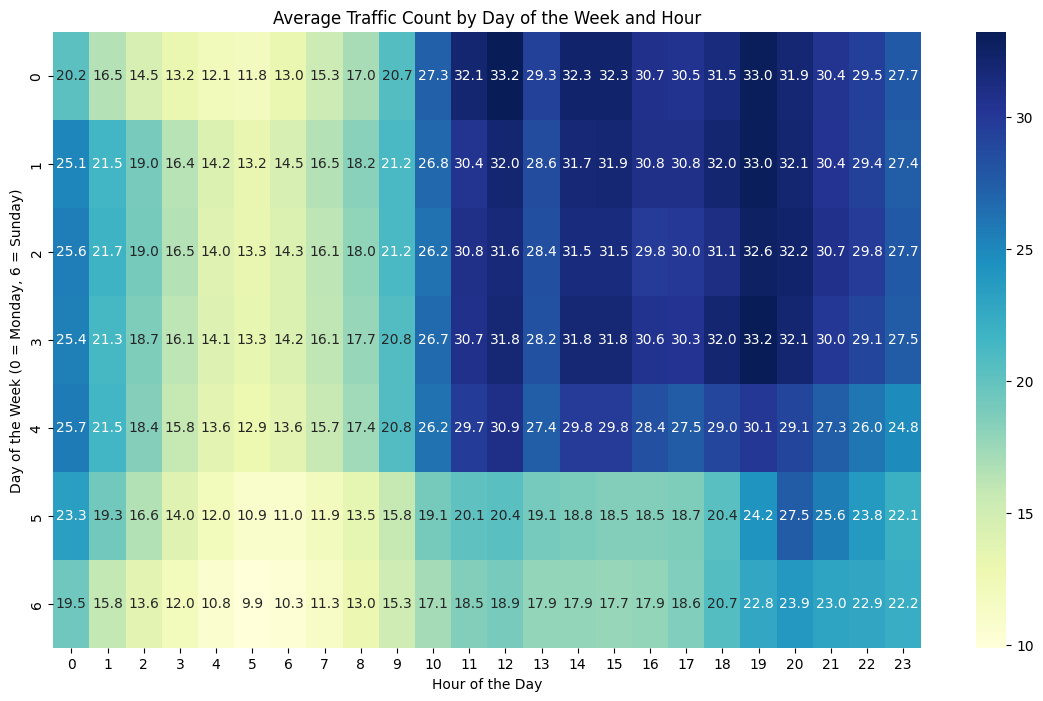

In [ ]:
# Plotting peak traffic times by combining both Day of the Week and Hour to identify peak traffic patterns
rw_df=df.copy()
rw_df['DayOfWeek']=rw_df['DateTime'].dt.dayofweek
plt.figure(figsize=(14, 8))
sns.heatmap(rw_df.pivot_table(values='Vehicles', index='DayOfWeek', columns='Hour', aggfunc='mean'), cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Traffic Count by Day of the Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.show()


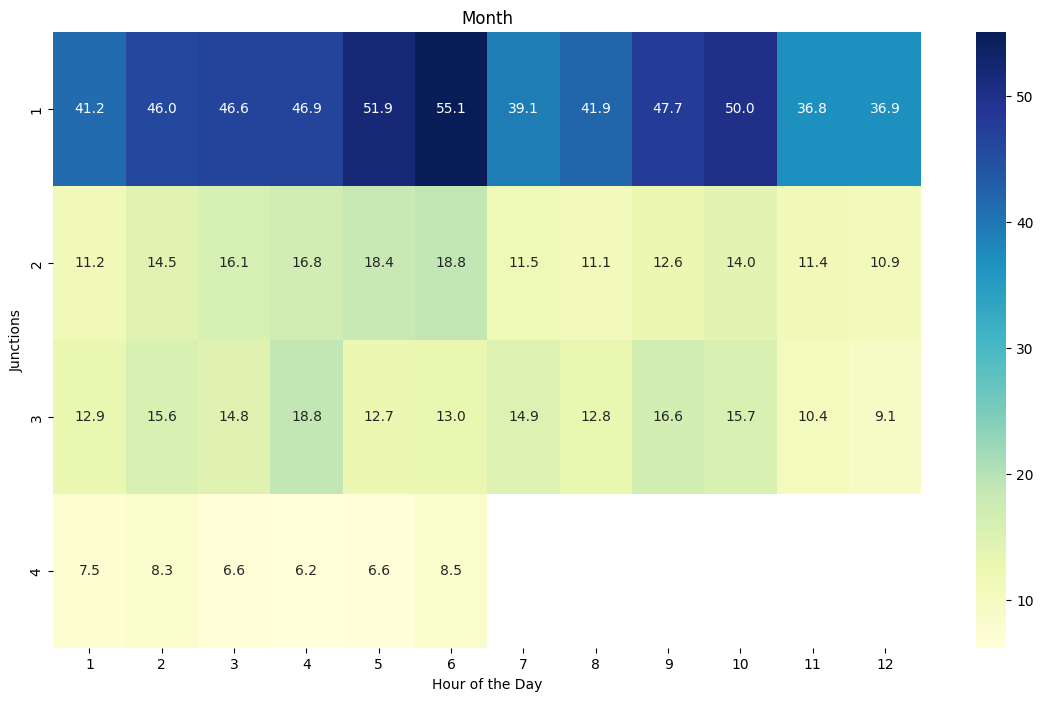

In [ ]:

plt.figure(figsize=(14, 8))
sns.heatmap(rw_df.pivot_table(values='Vehicles', index='Junction', columns='Month', aggfunc='mean'), cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Month')
plt.xlabel('Hour of the Day')
plt.ylabel('Junctions')
plt.show()


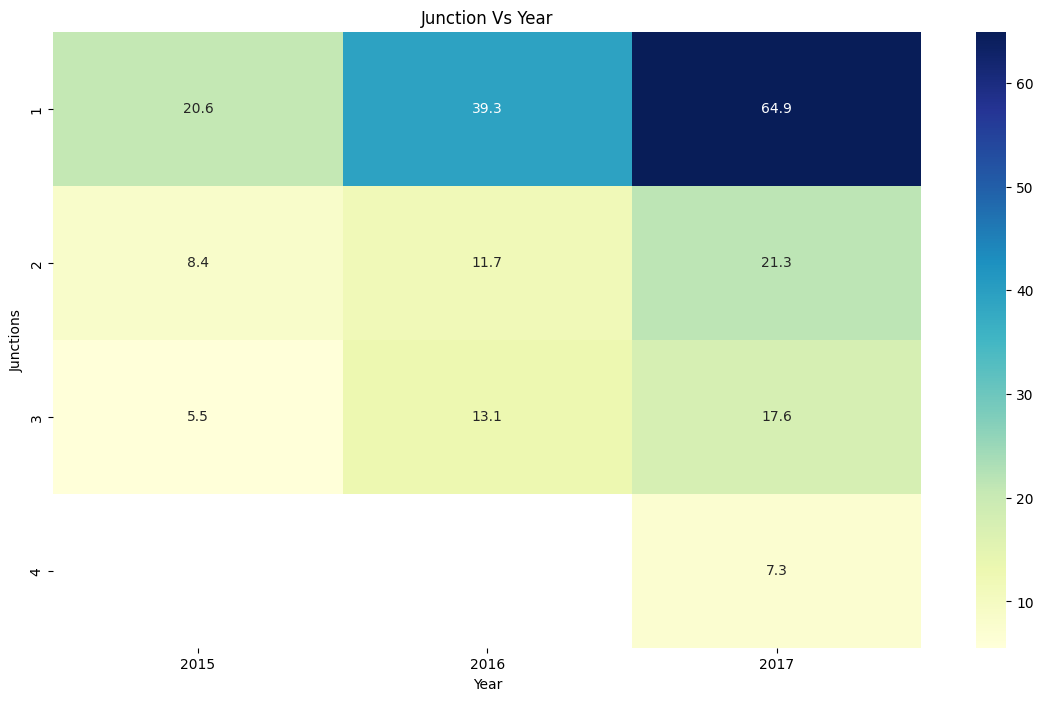

In [ ]:

plt.figure(figsize=(14, 8))
sns.heatmap(rw_df.pivot_table(values='Vehicles', index='Junction', columns='Year', aggfunc='mean'), cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Junction Vs Year')
plt.xlabel('Year')
plt.ylabel('Junctions')
plt.show()


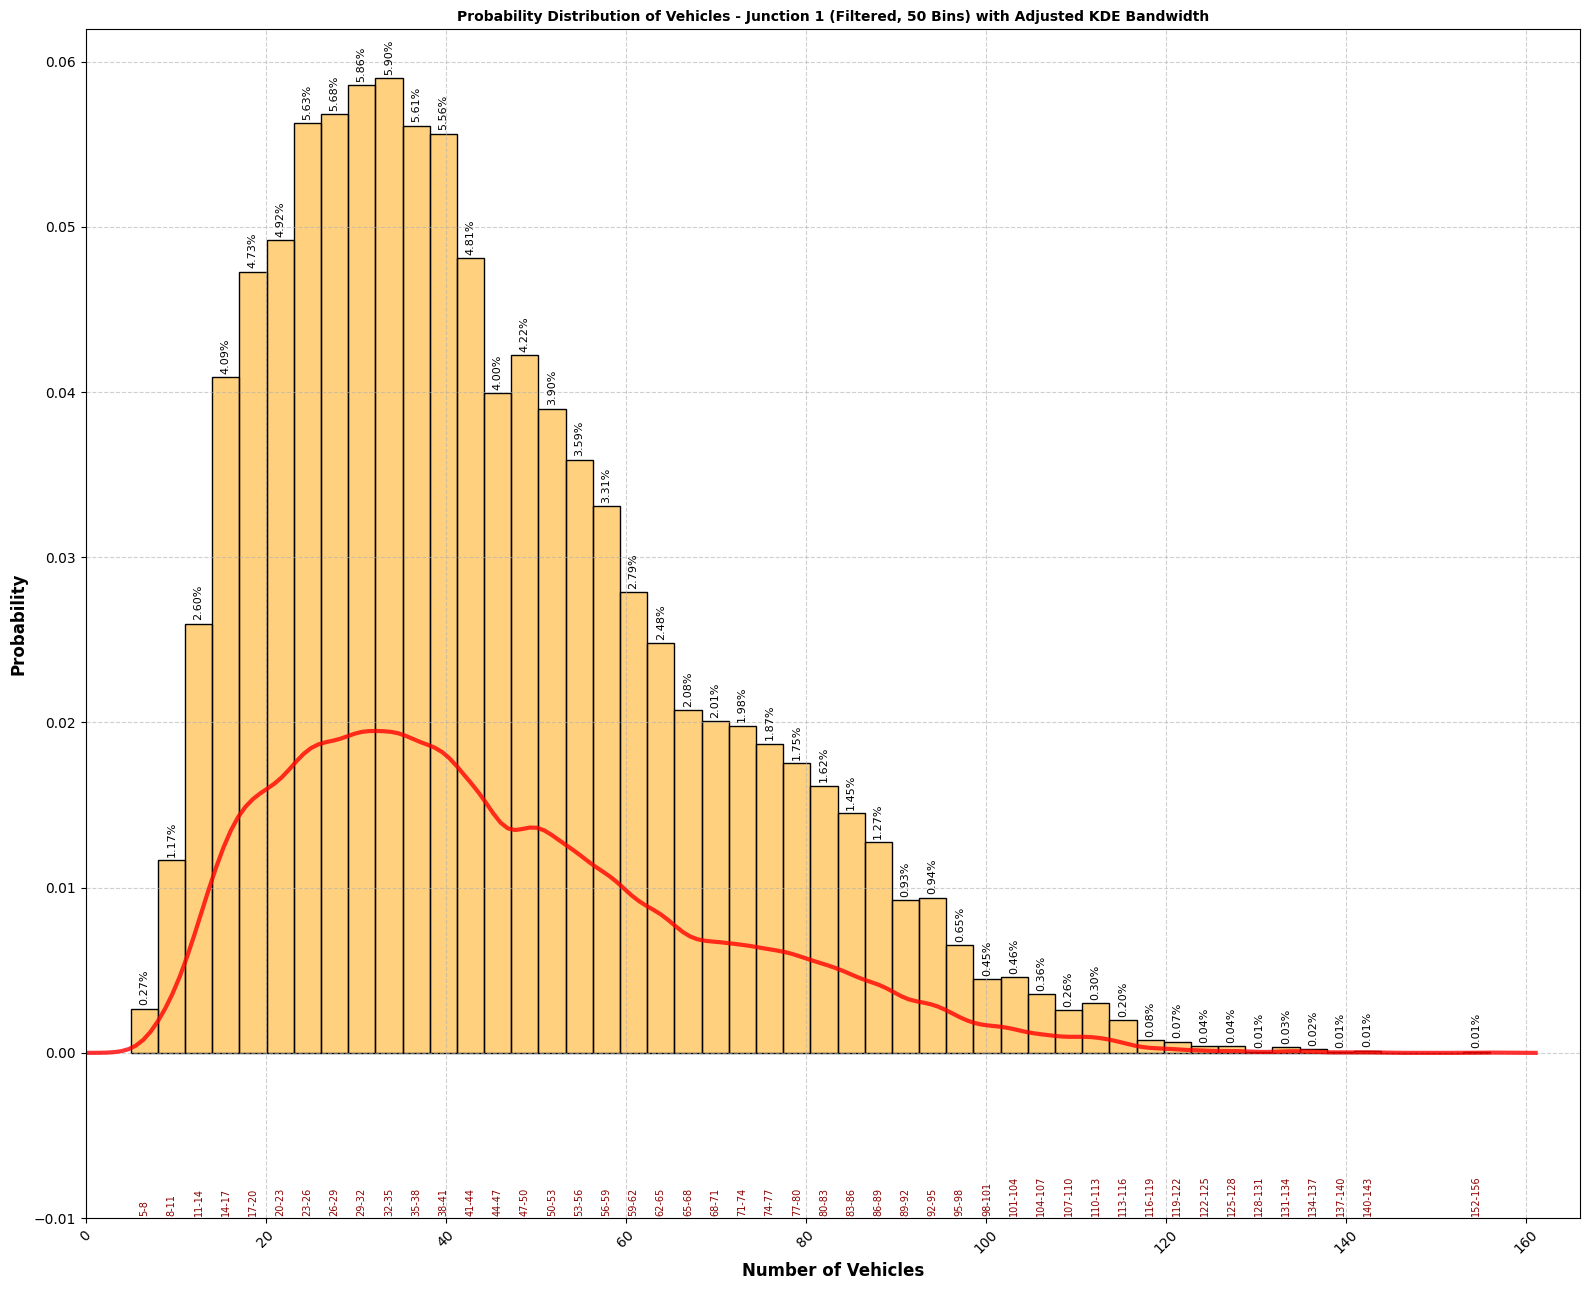

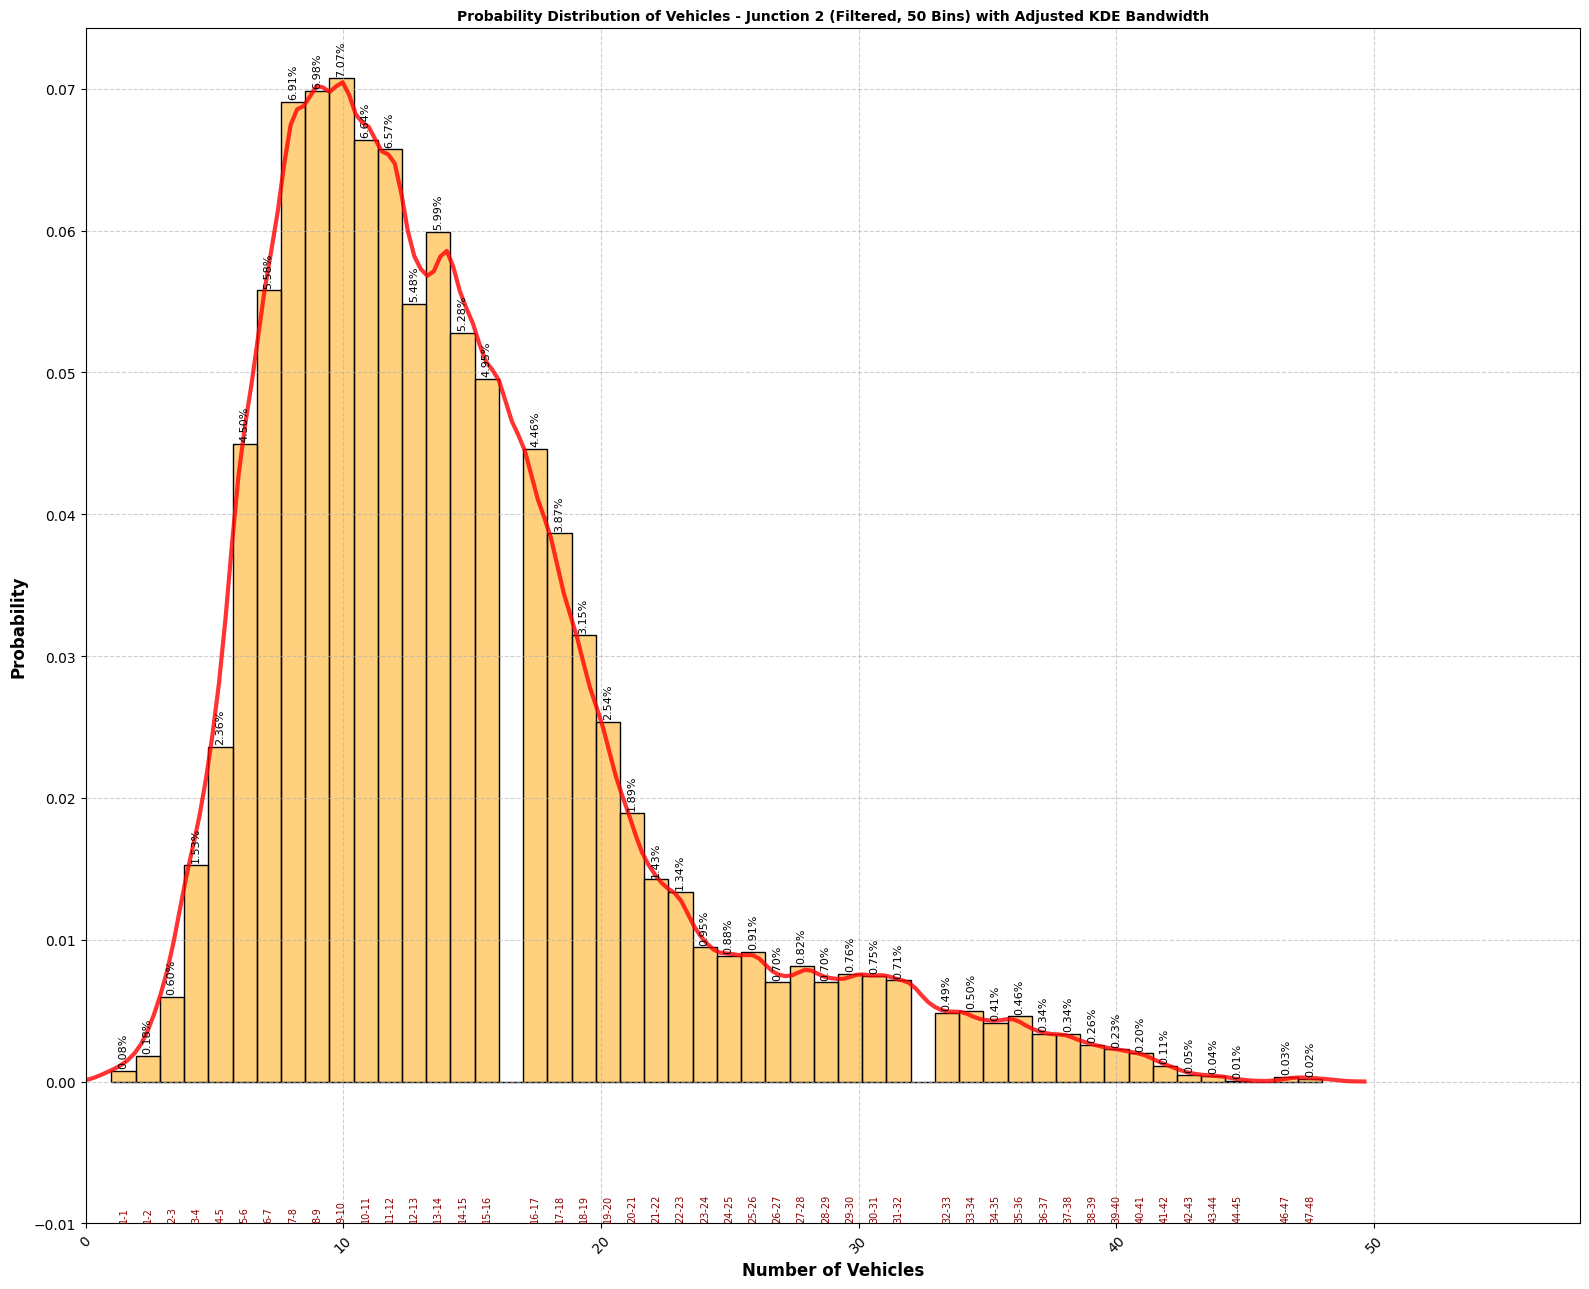

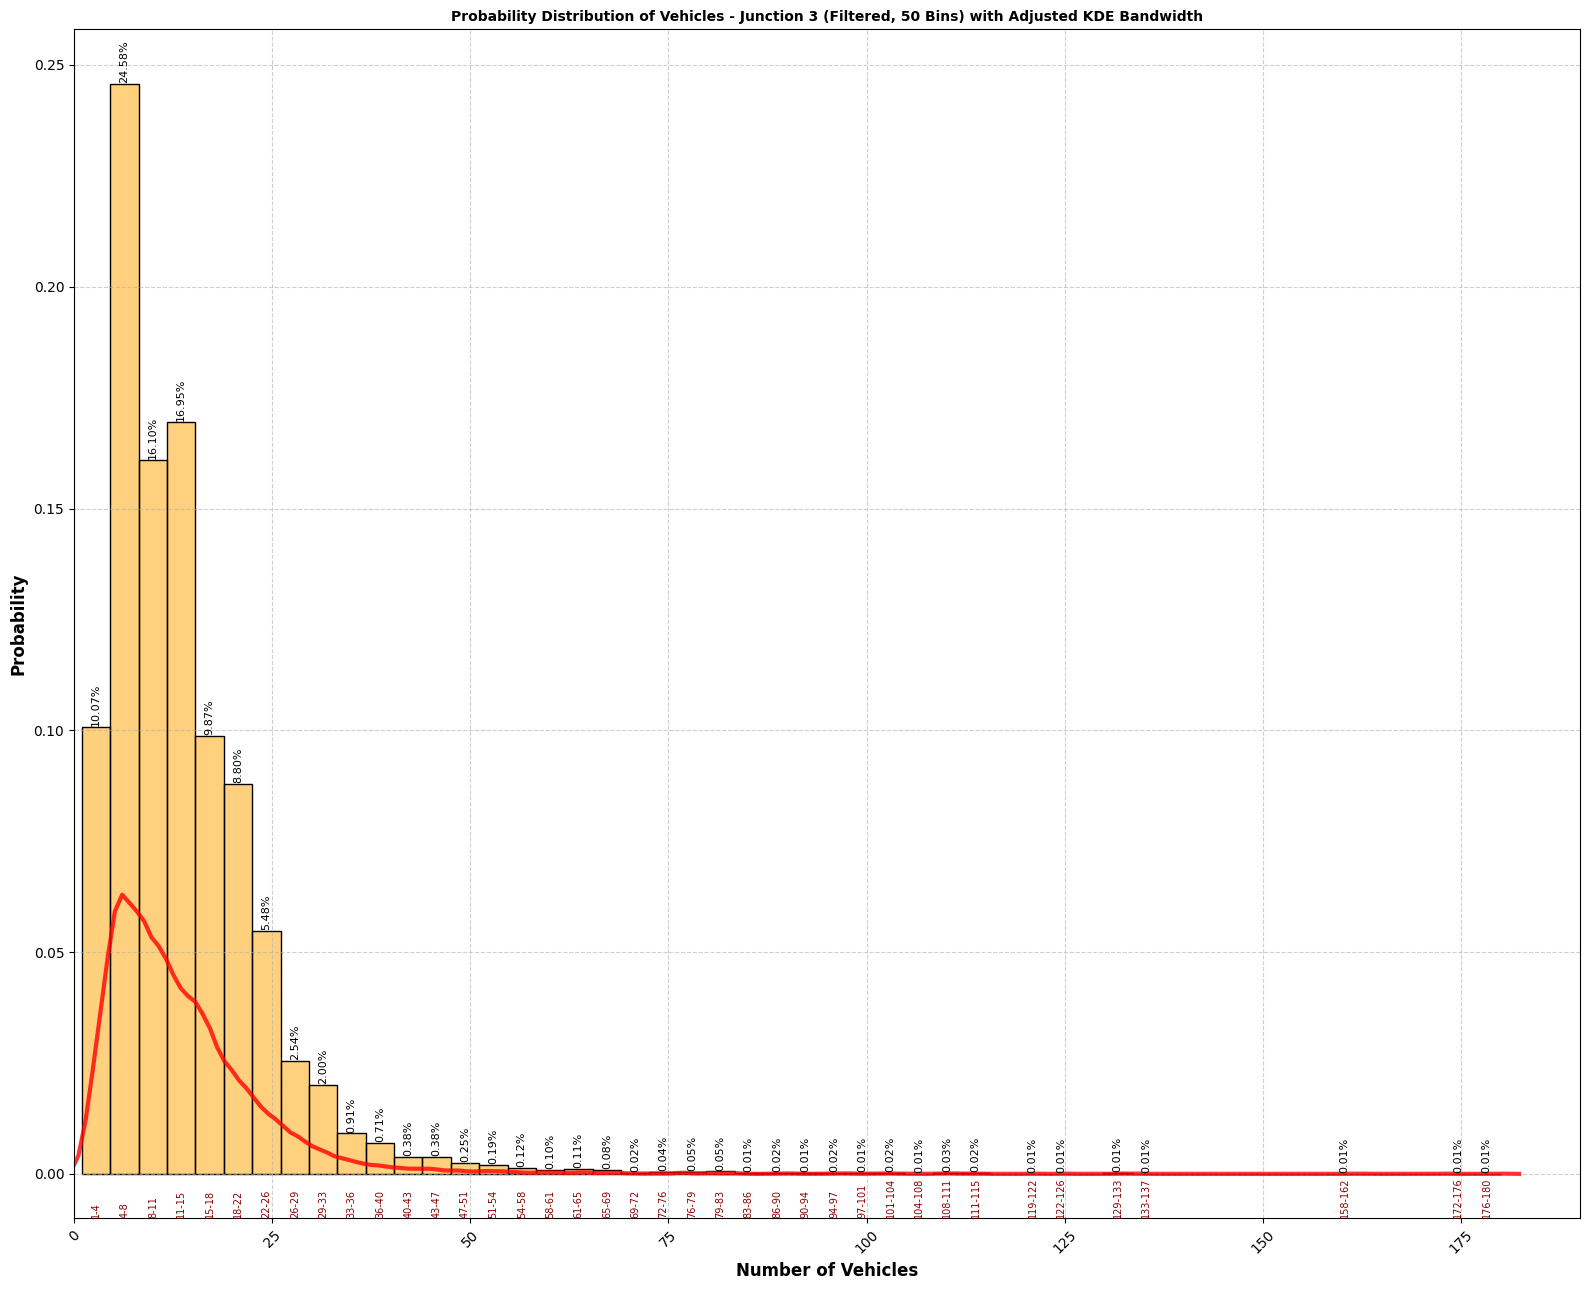

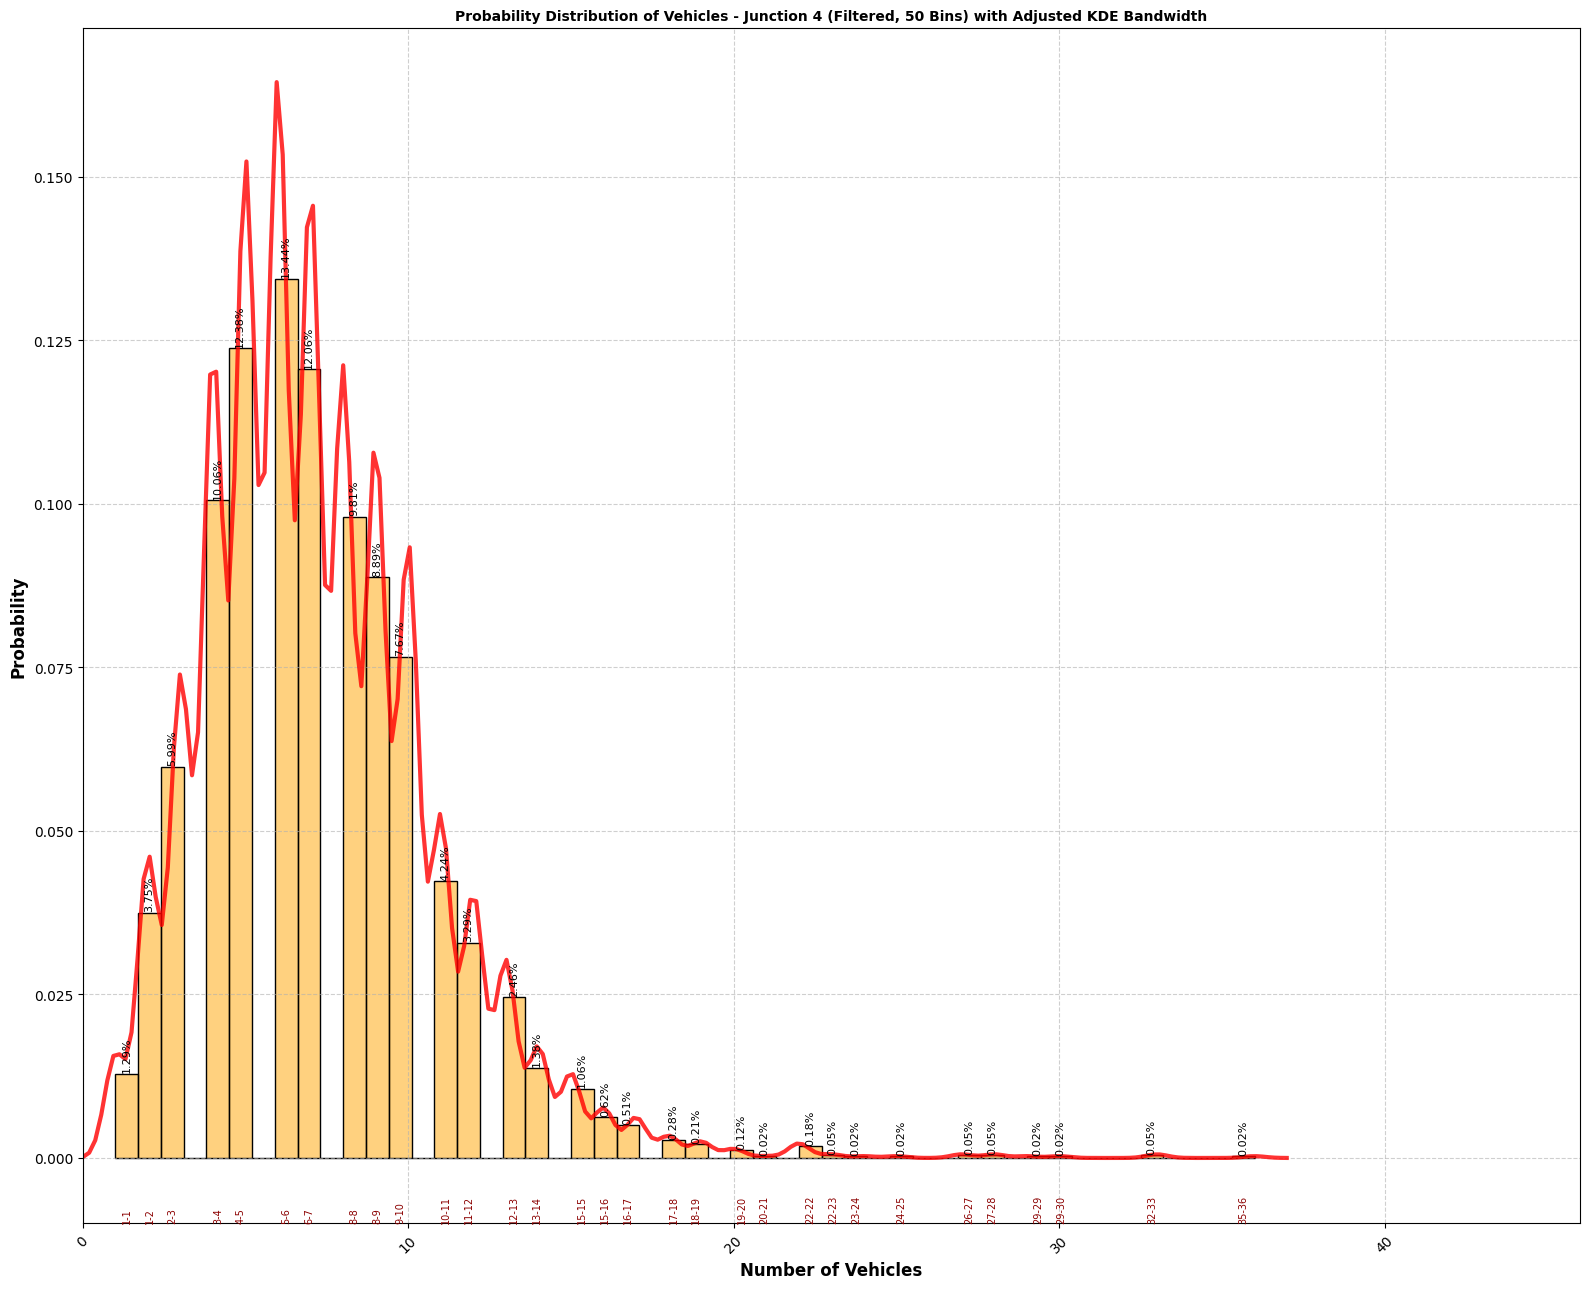

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting to ensure that plots appear in the notebook
%matplotlib inline

# Get unique junctions from the dataset
junctions = df['Junction'].unique()

# Loop through each junction to plot the histogram and KDE
for jun in junctions:
    # Filter the data for the current junction
    junction_data = df[df['Junction'] == jun]['Vehicles']

    # Plotting the histogram for the current junction
    plt.figure(figsize=(16, 13))  # Increased figure size to allow more space for labels

    # Plot the histogram with 70 bins, using a fill color for better visual distinction
    ax = sns.histplot(junction_data, kde=False, fill=True, stat='probability', bins=50, color='orange',
                      line_kws={'linewidth': 3, 'color': 'blue'}, edgecolor='black', alpha=0.5 )

    # Plotting the KDE line with adjusted bandwidth to make the curve smoother and using a different color
    sns.kdeplot(junction_data, ax=ax, color='red', linewidth=3., bw_adjust=0.5,alpha=0.8)

    # Define step size to control how often to annotate bins
    step_size = 5

    # Annotate each bar with the probability value for the current junction, adding space between bar and label
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        if height > 0:  # Annotate only if the height is greater than 0 to avoid clutter
            # Annotate the probability value above each bar
            ax.annotate(f'{height * 100:.2f}%',
                        ((p.get_x() + p.get_width() / 2.)-0.010, height + 0.0002),  # Adding more space by increasing y-coordinate
                        ha='center', va='bottom', fontsize=8, color='black', rotation=90)

            # Annotate the bin range every step_size bins

            ax.annotate(f'{int(p.get_x())}-{int(p.get_x() + p.get_width())}',
                        (p.get_x() + p.get_width() / 2., -0.0099),  # Moving bin labels just slightly below x-axis
                        ha='center', va='bottom', fontsize=7, color='darkred', rotation=90)

    # Setting titles and labels with improved formatting
    plt.title(f'Probability Distribution of Vehicles - Junction {jun} (Filtered, 50 Bins) with Adjusted KDE Bandwidth', fontsize=10, weight='bold')
    plt.xlabel('Number of Vehicles', fontsize=12, weight='bold')
    plt.ylabel('Probability', fontsize=12, weight='bold')

    # Rotate x-axis labels to avoid collision with bin labels
    plt.xticks(rotation=45)

    # Dynamically set the x-axis limit based on the data
    max_vehicle_count = junction_data.max()  # Get the maximum vehicle count for this junction
    plt.xlim(0, max_vehicle_count + 10)  # Add a small buffer to the max value for better visualization

    # Adjust y-axis limit to ensure bin labels are visible
    plt.ylim(-0.01, None)

    # Add grid and tight layout for better spacing
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Show the plot
    plt.show()  # Keep plt.show(), but without plt.close() to make sure plots are visible inline in Colab


Junction 1: Highest traffic, with vehicle counts mostly between 32-35. Shows high variability with significant fluctuations.

Junction 2: Moderate traffic, typically 9-10 vehicles. Stable flow, with less variation than Junction 1.

Junction 3: Low traffic (4-8 vehicles). Consistently low volume with very little variation.

Junction 4: Moderate traffic (5-6 vehicles), with a wider range. Traffic is less predictable compared to Junctions 2 and 3.

In [ ]:
junctions = df['Junction'].unique()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Loop through each junction to plot the time series of Vehicles vs DateTime
for jun in junctions:
    # Filter the data for the current junction
    junction_data = df[df['Junction'] == jun]

    # Extract month from DateTime and add as a new column
    junction_data['Month'] = junction_data['DateTime'].dt.month

    # Create an interactive plot
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=junction_data['DateTime'],
        y=junction_data['Vehicles'],
        mode='lines+markers',
        name=f'Junction {jun}',
        line=dict(color='blue'),
        hovertemplate='<b>Date-Time:</b> %{x|%Y-%m-%d %H:%M:%S}<br>' +
                      '<b>Month:</b> %{customdata}<br>' +
                      '<b>Vehicles:</b> %{y}<br>' +
                      '<extra></extra>',  # This removes the secondary hover text
        customdata=junction_data['Month']  # Add month as custom data for hover
    ))

    # Setting titles and labels
    fig.update_layout(
        title=f'Time Series of Vehicles - Junction {jun}',
        xaxis_title='Date-Time',
        yaxis_title='Number of Vehicles',
        xaxis_tickangle=-45,
        template='plotly_white'
    )

    # Show the interactive plot
    fig.show()

<ipython-input-12-fe4a307c0d08>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junction_data['Month'] = junction_data['DateTime'].dt.month


<ipython-input-12-fe4a307c0d08>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-12-fe4a307c0d08>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-12-fe4a307c0d08>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Junction 1: Least predictable due to high variability and frequent spikes in vehicle counts. Traffic ranges mostly between 20-40, with significant fluctuations.

Junction 2: Moderately predictable with consistent traffic flow between 10-20 vehicles. Less variation compared to Junction 1, resulting in a more stable pattern.

Junction 3: Highly predictable, with consistently low traffic (0-5 vehicles) and very little variation. The most stable junction in terms of traffic volume.

Junction 4: Moderate predictability, with traffic levels between 5-10 vehicles but showing a wider spread. Less stable compared to Junctions 2 and 3.

Overall, Junction 1 is the least predictable with fluctuating traffic levels, while Junction 3 is the most predictable with consistently low traffic. Junctions 2 and 4 fall in between, with moderate predictability.

In [ ]:
import plotly.express as px

# Create an interactive histogram with facets for each Junction
fig = px.histogram(
    df,
    x='Vehicles',
    color='Year',  # Use 'Year' as the hue for stacking
    barmode='stack',
    nbins=30,
    title='Histogram Showing the Distribution of Vehicles by Year and Junction',
    labels={'Vehicles': 'Vehicles', 'count': 'Count'},
    facet_col='Junction'  # Create a separate subplot for each Junction
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Vehicles',
    yaxis_title='Count',
    title_font=dict(size=20),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    template='plotly_white'
)

# Show the interactive plot
fig.show()


In [ ]:
# Calculating the average vehicle count per year for each junction
average_data = df.pivot_table(values='Vehicles', index='Junction', columns='Year', aggfunc='mean').fillna(0)

# Using Plotly to create an interactive grouped bar chart for average vehicle counts
fig = go.Figure()

# Adding each year's average data as a trace to the figure for separate bars
colors = ['#6a0dad', '#17becf', '#ffdd57']  # Custom colors to match the provided style
for idx, year in enumerate(average_data.columns):
    fig.add_trace(go.Bar(
        x=average_data.index,
        y=average_data[year],
        name=str(year),
        marker_color=colors[idx]
    ))

# Update layout for better visual appeal
fig.update_layout(
    title='Interactive Grouped Bar Chart of Average Vehicle Counts by Year for Each Junction',
    xaxis_title='Junction',
    yaxis_title='Average Vehicle Count',
    barmode='group',
    legend_title='Year',
    template='plotly_dark'
)

# Show the interactive chart
fig.show()


Junction 1 shows the highest traffic growth over time, with a broader distribution and an increase in higher vehicle counts.
Junctions 2 and 3 have experienced moderate increases in traffic over the years, but the counts remain mostly low.
Junction 4 has the lowest and most stable traffic levels, with minimal changes from 2015 to 2017.
Junction 1 is clearly the busiest and most variable, while Junction 4 remains consistently low and predictable. Junctions 2 and 3 fall in between, with slight increases but still lower overall traffic levels.

In [ ]:
# Standardize the data with mean=0 and Standard Deviation=1 (Z Score data distribution)
from sklearn.preprocessing import StandardScaler
std = lambda placeholder: StandardScaler().fit_transform(placeholder)
scaled_df = df.copy()
scaled_df['Vehicles'] = std(scaled_df['Vehicles'].values.reshape(-1, 1))
scaled_df.head()

DateTime  Junction  Vehicles  Year  Month  Day  Hour
0 2015-11-01 00:00:00         1 -0.375489  2015     11    1     0
1 2015-11-01 01:00:00         1 -0.471875  2015     11    1     1
2 2015-11-01 02:00:00         1 -0.616454  2015     11    1     2
3 2015-11-01 03:00:00         1 -0.761034  2015     11    1     3
4 2015-11-01 04:00:00         1 -0.664648  2015     11    1     4

In [ ]:
# Validate the mean of the "Vehicles" column
vehicles_mean = scaled_df['Vehicles'].mean()
vehicles_mean

-1.0395305194827734e-16

In [ ]:
# Validate the standard deviation of the "Vehicles" column
vehicles_std = scaled_df['Vehicles'].std()
vehicles_std


1.0000103908520954

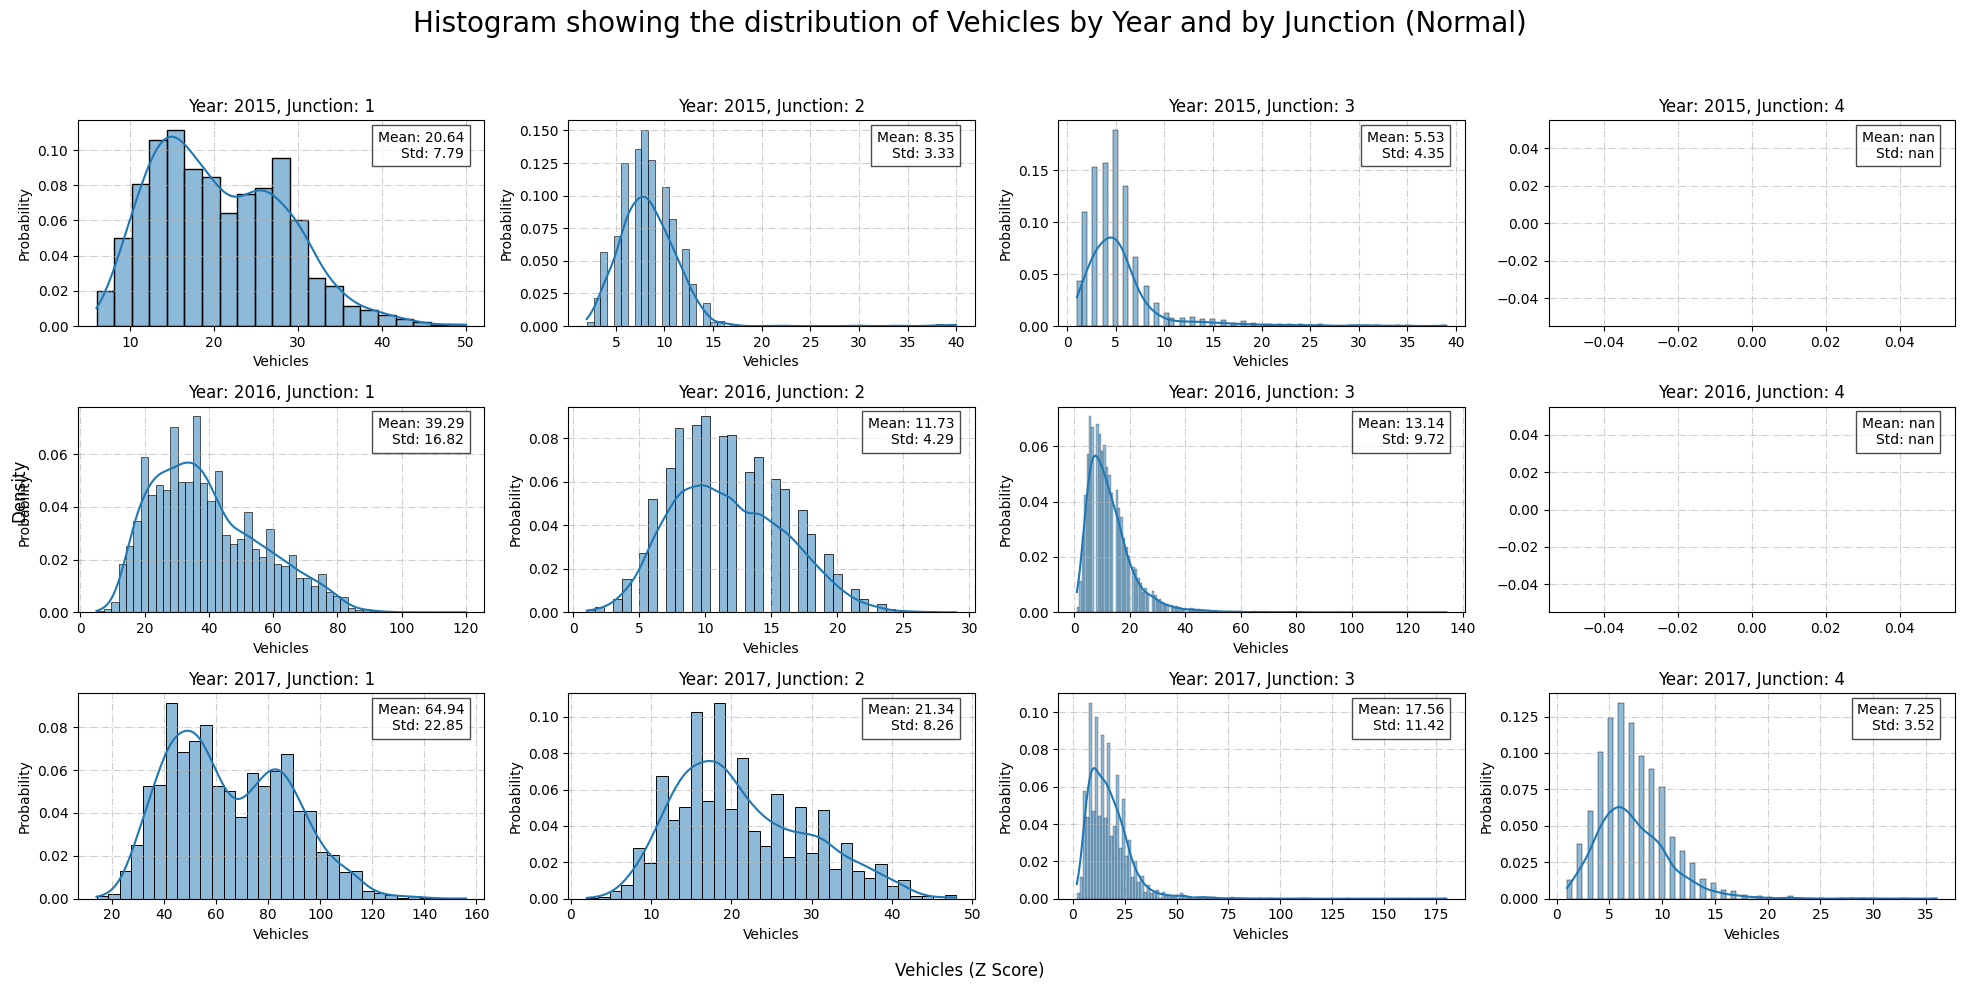

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected code using the 'junction' variable with mean and std displayed
f, axis = plt.subplots(3, 4, figsize=(20, 10))

# Loop through years and junctions
for i, year in enumerate(range(2015, 2018)):  # 3 years: 2015, 2016, 2017
    for j, junc in enumerate(junctions):  # Use 'junction' variable (assumed to be [1, 2, 3, 4])
        # Filter the data for the current year and junction
        data = df[(df.Junction == junc) & (df.Year == year)]['Vehicles']

        # Calculate mean and standard deviation
        mean_val = data.mean()
        std_val = data.std()

        # Plot histogram with KDE
        sns.histplot(data, kde=True, ax=axis[i, j], stat='probability')

        # Annotate the plot with mean and standard deviation
        axis[i, j].text(0.95, 0.95, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                        transform=axis[i, j].transAxes,
                        verticalalignment='top',
                        horizontalalignment='right',
                        bbox=dict(facecolor='white', alpha=0.7))

        axis[i, j].grid(True, alpha=0.6, ls='-.')
        axis[i, j].set_title(f'Year: {year}, Junction: {junc}')

# Set global x and y labels
f.supxlabel('Vehicles (Z Score)')
f.supylabel('Density')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction (Normal)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


Increasing Mean and Std: For Junctions 1, 2, and 3, both the mean and std are increasing, indicating an upward trend in traffic volume as well as increased variability. This means that traffic not only grew, but also became more unpredictable over time.
Fluctuating Trend in Junction 2: Although Junction 2 shows an increase in mean, the increasing std and fluctuations in 2017 indicate inconsistency in the growth trend.
Low Mean and Std for Junction 4: Junction 4 has consistently low traffic with minimal variation, as indicated by the low mean and std.

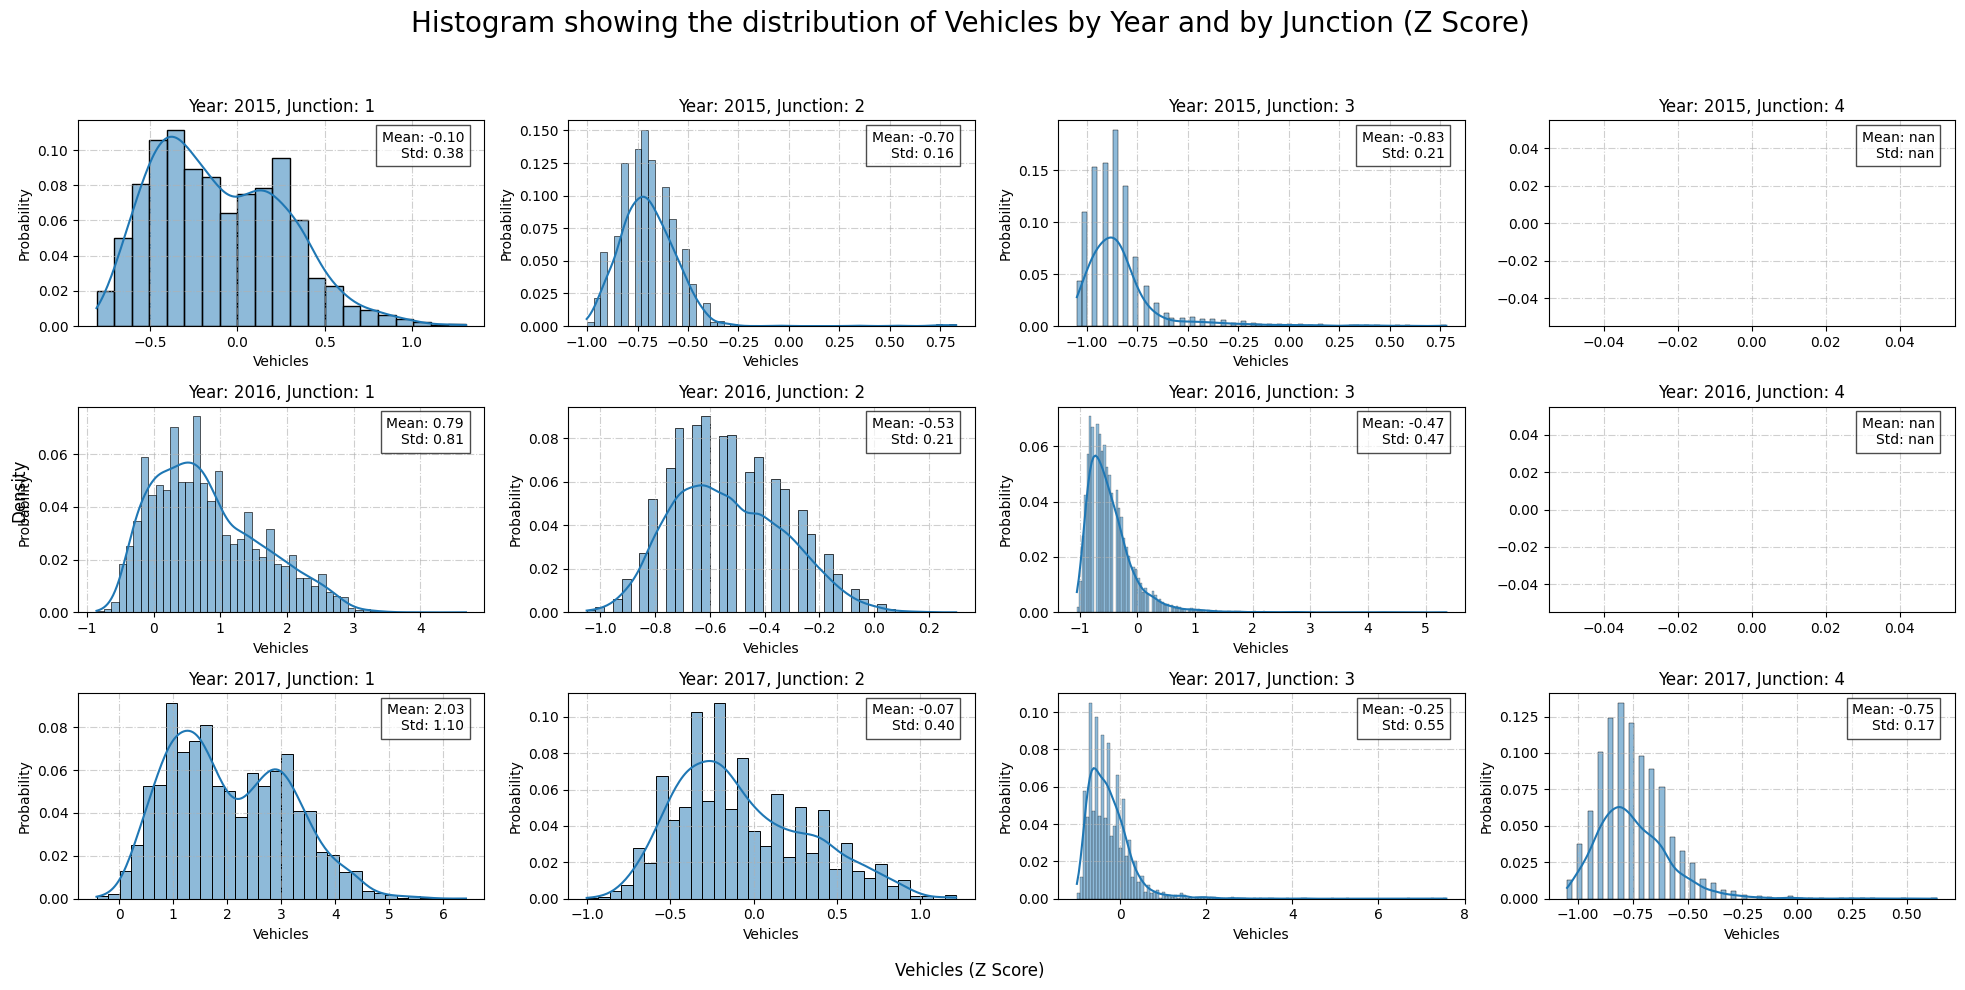

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axis = plt.subplots(3, 4, figsize=(20, 10))

# Loop through years and junctions
for i, year in enumerate(range(2015, 2018)):  # 3 years: 2015, 2016, 2017
    for j, junc in enumerate(junctions):  # Use 'junction' variable (assumed to be [1, 2, 3, 4])
        # Filter the data for the current year and junction
        data = scaled_df[(scaled_df.Junction == junc) & (scaled_df.Year == year)]['Vehicles']

        # Calculate mean and standard deviation
        mean_val = data.mean()
        std_val = data.std()

        # Plot histogram with KDE
        sns.histplot(data, kde=True, ax=axis[i, j], stat='probability')

        # Annotate the plot with mean and standard deviation
        axis[i, j].text(0.95, 0.95, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                        transform=axis[i, j].transAxes,
                        verticalalignment='top',
                        horizontalalignment='right',
                        bbox=dict(facecolor='white', alpha=0.7))

        axis[i, j].grid(True, alpha=0.6, ls='-.')
        axis[i, j].set_title(f'Year: {year}, Junction: {junc}')

# Set global x and y labels
f.supxlabel('Vehicles (Z Score)')
f.supylabel('Density')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction (Z Score)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


In [ ]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# Create a subplot with 3 rows and 4 columns
fig = sp.make_subplots(rows=3, cols=4,
                       subplot_titles=[f"Year {year}, Junction {junction}" for year in range(2015, 2018) for junction in range(1, 5)],
                       shared_xaxes=True, shared_yaxes=True)

# Add histograms for each combination of year and junction
for i, year in enumerate(range(2015, 2018)):
    for j, junction in enumerate(range(1, 5)):
        filtered_data = scaled_df[(scaled_df.Junction == junction) & (scaled_df.Year == year)]
        hist = go.Histogram(x=filtered_data['Vehicles'], histnorm='probability', name=f"Year {year}, Junction {junction}")

        # Add the plot to the appropriate subplot
        fig.add_trace(hist, row=i+1, col=j+1)

# Update layout for better aesthetics
fig.update_layout(
    title_text="Interactive Histogram: Vehicles by Year and Junction (Z Score Standardized Data)",
    height=700, width=1200,
    showlegend=False,
    xaxis_title="Z Score (Standardized Vehicles)",
    yaxis_title="Probability",
)

# Show the figure
fig.show()


In [ ]:

# Interactive boxplot for the range of Vehicles by Year and by Junction
import plotly.express as px

# Extract year from DateTime
df['Year'] = df['DateTime'].dt.year

# Loop through each year to create interactive boxplots for each junction
years = range(2015, 2018)
for year in years:
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Create boxplot for all junctions in the given year
    fig = px.box(year_data, x='Junction', y='Vehicles', color='Junction',
                 title=f'Boxplot of Vehicles for Year {year}',
                 labels={'Vehicles': 'Number of Vehicles', 'Junction': 'Junction'},
                 template='plotly_white')

    # Update layout for better presentation
    fig.update_layout(
        xaxis_title='Junction',
        yaxis_title='Number of Vehicles',
        xaxis_tickangle=-45
    )

    # Show interactive boxplot
    fig.show()

Junction 1: Consistently shows high outliers across all years, with increasing frequency and magnitude of spikes, indicating growing traffic and more frequent extreme congestion.

Junction 2: Outliers indicate occasional spikes in traffic, with increasing magnitude over the years, reflecting moderate growth in unexpected high traffic events.

Junction 3: Initially stable with occasional outliers, but outliers increased in frequency and magnitude from 2015 to 2017, showing gradual growth in traffic variability.

Junction 4: Limited data, but 2017 shows some outliers indicating occasional peaks, though overall traffic remains low.

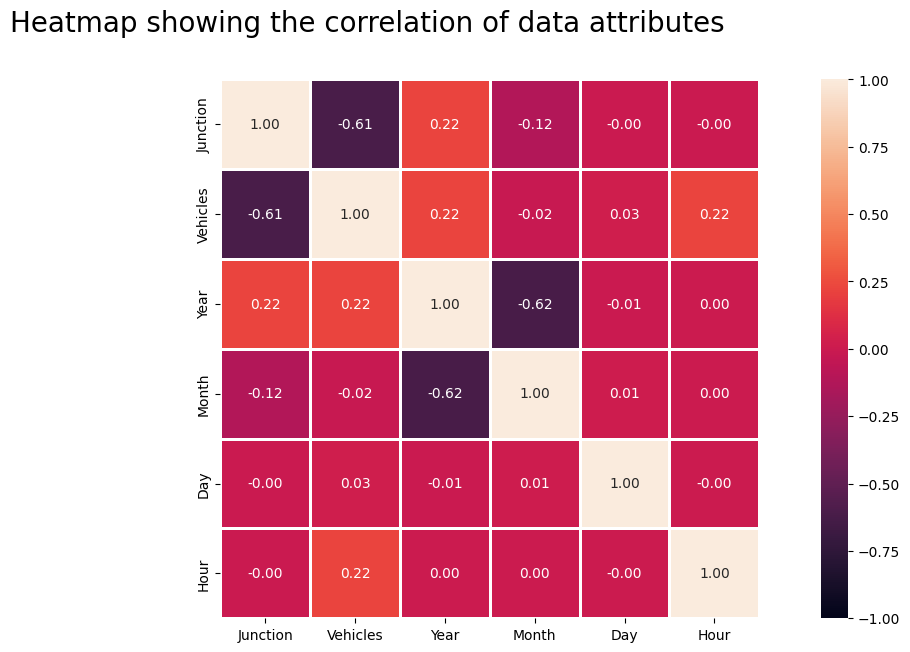

In [ ]:
corr = df[['Junction','Vehicles','Year','Month','Day','Hour']].corr()
f, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=1)
f.suptitle('Heatmap showing the correlation of data attributes', fontsize=20)
plt.show()

Junction and Vehicles have a notable negative correlation, indicating that traffic volume varies significantly by junction.


Year and Vehicles show a slight positive correlation, suggesting an increasing trend in traffic over the years.

Month and Year have a negative correlation, indicating possible seasonal effects.

Weak Correlations between Day, Month, and Hour with traffic suggest that daily or monthly variations do not significantly impact the number of vehicles.

In [ ]:
def create_df(dataf):
    # Group by Junction to create list of DataFrames, and then drop the 'Junction' column from each group
    return [group.drop('Junction', axis=1) for _, group in dataf.groupby('Junction')]



# Use the function to get list of dataframes for each junction
data = create_df(df)
for i, junction_data in enumerate(data):
    print(f'Junction {i + 1} Data Preview:')
    print(junction_data.head(1))

Junction 1 Data Preview:
    DateTime  Vehicles  Year  Month  Day  Hour
0 2015-11-01        15  2015     11    1     0
Junction 2 Data Preview:
        DateTime  Vehicles  Year  Month  Day  Hour
14592 2015-11-01         6  2015     11    1     0
Junction 3 Data Preview:
        DateTime  Vehicles  Year  Month  Day  Hour
29184 2015-11-01         9  2015     11    1     0
Junction 4 Data Preview:
        DateTime  Vehicles  Year  Month  Day  Hour
43776 2017-01-01         3  2017      1    1     0


In [ ]:
type(data)

list

In [ ]:
data

[                 DateTime  Vehicles  Year  Month  Day  Hour
 0     2015-11-01 00:00:00        15  2015     11    1     0
 1     2015-11-01 01:00:00        13  2015     11    1     1
 2     2015-11-01 02:00:00        10  2015     11    1     2
 3     2015-11-01 03:00:00         7  2015     11    1     3
 4     2015-11-01 04:00:00         9  2015     11    1     4
 ...                   ...       ...   ...    ...  ...   ...
 14587 2017-06-30 19:00:00       105  2017      6   30    19
 14588 2017-06-30 20:00:00        96  2017      6   30    20
 14589 2017-06-30 21:00:00        90  2017      6   30    21
 14590 2017-06-30 22:00:00        84  2017      6   30    22
 14591 2017-06-30 23:00:00        78  2017      6   30    23
 
 [14592 rows x 6 columns],
                  DateTime  Vehicles  Year  Month  Day  Hour
 14592 2015-11-01 00:00:00         6  2015     11    1     0
 14593 2015-11-01 01:00:00         6  2015     11    1     1
 14594 2015-11-01 02:00:00         5  2015     11    1  

In [ ]:
print(junction_data['DateTime'].min(), junction_data['DateTime'].max())


2017-01-01 00:00:00 2017-06-30 23:00:00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


def draw_plot(identifier):
  fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Increase the figure size
    # Loop through each junction DataFrame
  for i, junction_data in enumerate(data):
      # Plot for each junction
      junction_data = data[i].copy().assign(DateTime=pd.to_datetime(junction_data['DateTime'])).set_index('DateTime').resample('YE')['Vehicles'].sum().reset_index()
      ax = axes[i // 2, i % 2]
      ax.plot(junction_data['DateTime'].dt.year, junction_data['Vehicles'], marker='o')
      ax.set_title(f'Junction {i + 1}: Vehicles vs Year', fontsize=14)
      ax.set_xlabel(identifier, fontsize=12)
      ax.set_ylabel('Number of Vehicles', fontsize=12)
      ax.grid(True)

      # Improve date formatting on the X-axis for better readability
      ax.tick_params(axis='x', rotation=45)

  # Adjust layout for better readability
  plt.tight_layout()
  plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def draw_plot_with_hover(identifier):
    # Create a subplot for all junctions (2x2)
    fig = make_subplots(rows=2, cols=2, subplot_titles=[f'Junction {i + 1}' for i in range(4)])

    # Define the valid date range (e.g., from 2015 onwards)
    start_date = pd.to_datetime('2015-01-01')
    end_date = pd.to_datetime('2018-12-31')

    # Loop through each junction DataFrame
    for i, junction_data in enumerate(data):
        # Convert DateTime and filter valid dates
        junction_data = junction_data.copy().assign(DateTime=pd.to_datetime(junction_data['DateTime']))
        junction_data = junction_data.loc[(junction_data['DateTime'] >= start_date) & (junction_data['DateTime'] <= end_date)]

        # Resample based on the identifier
        if identifier == 'Year':
            junction_data = junction_data.set_index('DateTime').resample('Y')['Vehicles'].sum().reset_index()
            xx = junction_data['DateTime'].dt.year
        elif identifier == 'Month':
            junction_data = junction_data.set_index('DateTime').resample('M')['Vehicles'].sum().reset_index()
            xx = junction_data['DateTime'].dt.strftime('%Y-%m')  # Show year and month in hover
        elif identifier == 'Week':
            junction_data = junction_data.set_index('DateTime').resample('W')['Vehicles'].sum().reset_index()
            xx = junction_data['DateTime'].dt.strftime('%Y-%W')  # Show year and week number
        elif identifier == 'Day':
            junction_data = junction_data.set_index('DateTime').resample('D')['Vehicles'].sum().reset_index()
            xx = junction_data['DateTime'].dt.strftime('%Y-%m-%d')  # Show exact date
        elif identifier == '12hour':
            junction_data = junction_data.set_index('DateTime').resample('12H')['Vehicles'].sum().reset_index()
            xx = junction_data['DateTime'].dt.strftime('%Y-%m-%d %H:%M')  # Show full datetime with 12-hour intervals
        elif identifier == '6hour':
            junction_data = junction_data.set_index('DateTime').resample('6H')['Vehicles'].sum().reset_index()
            xx = junction_data['DateTime'].dt.strftime('%Y-%m-%d %H:%M')  # Show full datetime with 6-hour intervals

        # Create a line plot with hover information
        trace = go.Scatter(
            x=xx,
            y=junction_data['Vehicles'],
            mode='lines+markers',
            name=f'Junction {i + 1}',
            hovertemplate='Date: %{x}<br>Vehicles: %{y}<extra></extra>'
        )

        # Add trace to the appropriate subplot (i // 2 + 1 for rows, i % 2 + 1 for columns)
        fig.add_trace(trace, row=i // 2 + 1, col=i % 2 + 1)

    # Update layout
    fig.update_layout(
        title_text=f'Vehicles vs {identifier} for All Junctions',
        xaxis_title=identifier,
        yaxis_title='Number of Vehicles',
        height=700, width=1000,
        showlegend=False
    )

    # Show the plot
    fig.show()


In [ ]:

# Now you can call the function to generate the plot
draw_plot_with_hover('Year')
draw_plot_with_hover('Month')
draw_plot_with_hover('Week')
draw_plot_with_hover('Day')



<ipython-input-24-a0c742da9835>:21: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-24-a0c742da9835>:21: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-24-a0c742da9835>:21: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-24-a0c742da9835>:21: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<ipython-input-24-a0c742da9835>:24: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-24-a0c742da9835>:24: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-24-a0c742da9835>:24: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-24-a0c742da9835>:24: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Junction 1: Shows a consistent upward trend in traffic both monthly and weekly, suggesting growing demand and road usage.

Junction 2: Traffic increases significantly starting from early 2017

Junction 3: Experiences high variability in traffic volume, both monthly and weekly, indicating irregular and possibly seasonal influences.

Junction 4: Traffic is relatively stable but lower compared to other junctions, with minor fluctuations over time.

In [ ]:
draw_plot_with_hover('12hour')
draw_plot_with_hover('6hour')


<ipython-input-114-1ca37459737e>:33: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-114-1ca37459737e>:33: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-114-1ca37459737e>:33: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-114-1ca37459737e>:33: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



<ipython-input-114-1ca37459737e>:36: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-114-1ca37459737e>:36: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-114-1ca37459737e>:36: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-114-1ca37459737e>:36: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def draw_plot_with_mean_std(identifier,plotname):
    # Create a subplot for all junctions (2x2)
    fig = make_subplots(rows=2, cols=2, subplot_titles=[f'Junction {i + 1}' for i in range(4)])

    # Define the valid date range (e.g., from 2015 onwards)
    start_date = pd.to_datetime('2015-01-01')
    end_date = pd.to_datetime('2018-12-31')

    # Loop through each junction DataFrame
    for i, junction_data in enumerate(data):
        # Convert DateTime and filter valid dates
        junction_data = junction_data.copy().assign(DateTime=pd.to_datetime(junction_data['DateTime']))
        ##junction_data = junction_data.groupby('Year', group_keys=False).apply(lambda x: x.sample(min(len(x), 200)))
        junction_data = junction_data.loc[(junction_data['DateTime'] >= start_date) & (junction_data['DateTime'] <= end_date)]



        # Resample and calculate mean and standard deviation based on the identifier
        if identifier == 'Year':
            resampled_data = junction_data.set_index('DateTime').resample('Y')['Vehicles'].agg(['mean', 'std']).reset_index()
            xx = resampled_data['DateTime'].dt.year
        elif identifier == 'Month':
            resampled_data = junction_data.set_index('DateTime').resample('M')['Vehicles'].agg(['mean', 'std']).reset_index()
            xx = resampled_data['DateTime'].dt.strftime('%Y-%m')
        elif identifier == 'Week':
            resampled_data = junction_data.set_index('DateTime').resample('W')['Vehicles'].agg(['mean', 'std']).reset_index()
            xx = resampled_data['DateTime'].dt.strftime('%Y-%W')
        elif identifier == 'Day':
            resampled_data = junction_data.set_index('DateTime').resample('D')['Vehicles'].agg(['mean', 'std']).reset_index()
            xx = resampled_data['DateTime'].dt.strftime('%Y-%m-%d')
        elif identifier == '12hour':
            resampled_data = junction_data.set_index('DateTime').resample('12H')['Vehicles'].agg(['mean', 'std']).reset_index()
            xx = resampled_data['DateTime'].dt.strftime('%Y-%m-%d %H:%M')
        elif identifier == '6hour':
            resampled_data = junction_data.set_index('DateTime').resample('6H')['Vehicles'].agg(['mean', 'std']).reset_index()
            xx = resampled_data['DateTime'].dt.strftime('%Y-%m-%d %H:%M')

        # Create a line plot with hover information, mean values, and error bars for standard deviation
        trace = go.Scatter(
            x=xx,
            y=resampled_data['mean'],
            mode='lines+markers',
            name=f'Junction {i + 1}',
            error_y=dict(
                type='data',
                array=resampled_data['std'],
                visible=True
            ),
            line=dict(width=2),  # Adjust the line width here
            hovertemplate='Date: %{x}<br>Mean Vehicles: %{y}<br>Std: %{customdata}<extra></extra>',
            customdata=resampled_data['std']
        )

        # Add trace to the appropriate subplot (i // 2 + 1 for rows, i % 2 + 1 for columns)
        fig.add_trace(trace, row=i // 2 + 1, col=i % 2 + 1)

    # Update layout
    fig.update_layout(
        title_text=f'Mean and Std of Vehicles vs {identifier} for All Junctions',
        xaxis_title=identifier,
        yaxis_title='Number of Vehicles (Mean)',
        height=3000, width=4000,
        showlegend=False
    )
    # Save the plot as an HTML file and open it in a new tab
    import plotly.offline as pyo
    plotname=plotname+'.html'
    pyo.plot(fig, filename=plotname, auto_open=True)


In [ ]:

# Now you can call the function with the appropriate identifier
draw_plot_with_mean_std('Year','plotname_year')
draw_plot_with_mean_std('Month','plotname_month')
draw_plot_with_mean_std('Week','plotname_Week')
draw_plot_with_mean_std('Day','plotname_day')


<ipython-input-31-d12866f9906d>:24: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-31-d12866f9906d>:24: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-31-d12866f9906d>:24: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-31-d12866f9906d>:24: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-31-d12866f9906d>:27: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-31-d12866f9906d>:27: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-31-d12866f9906d>:27: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-31-d12866f9906d>:27: Futur

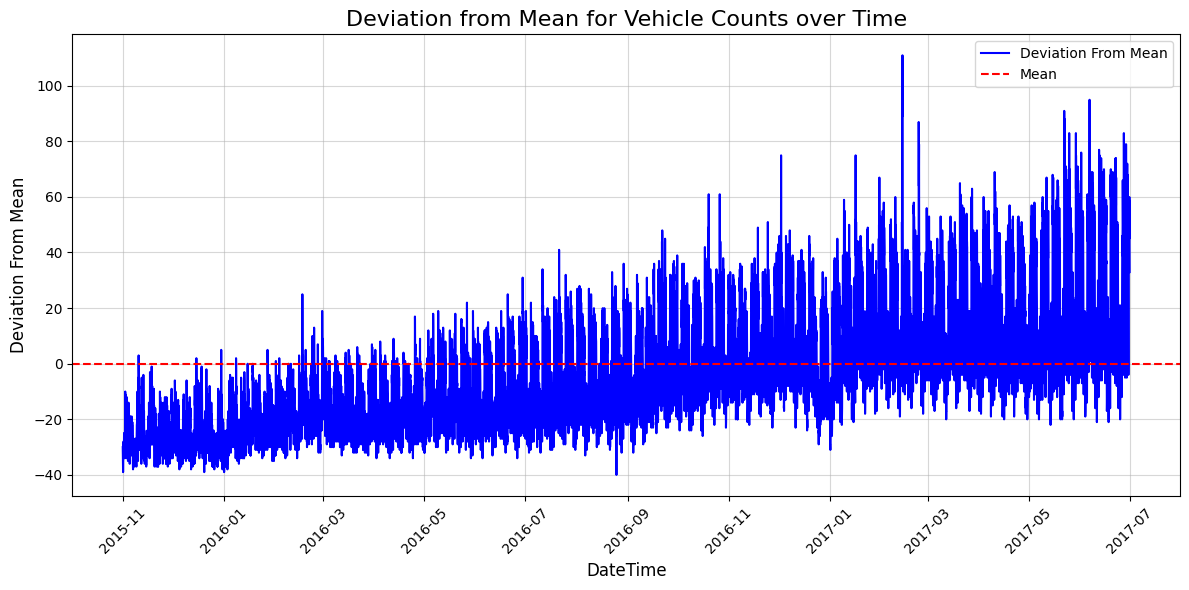

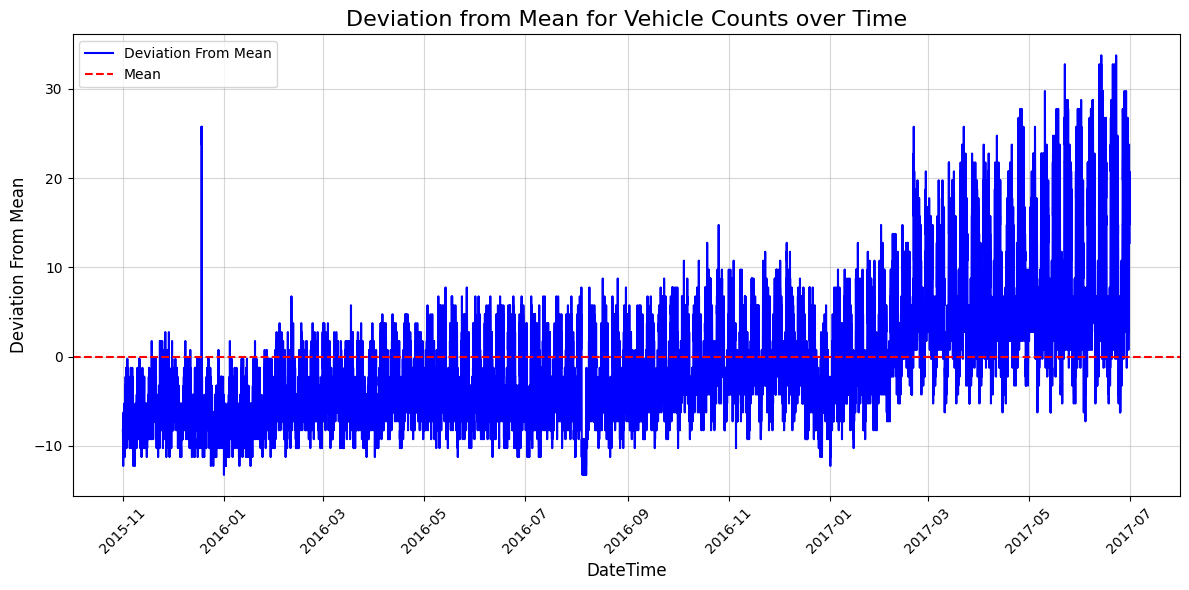

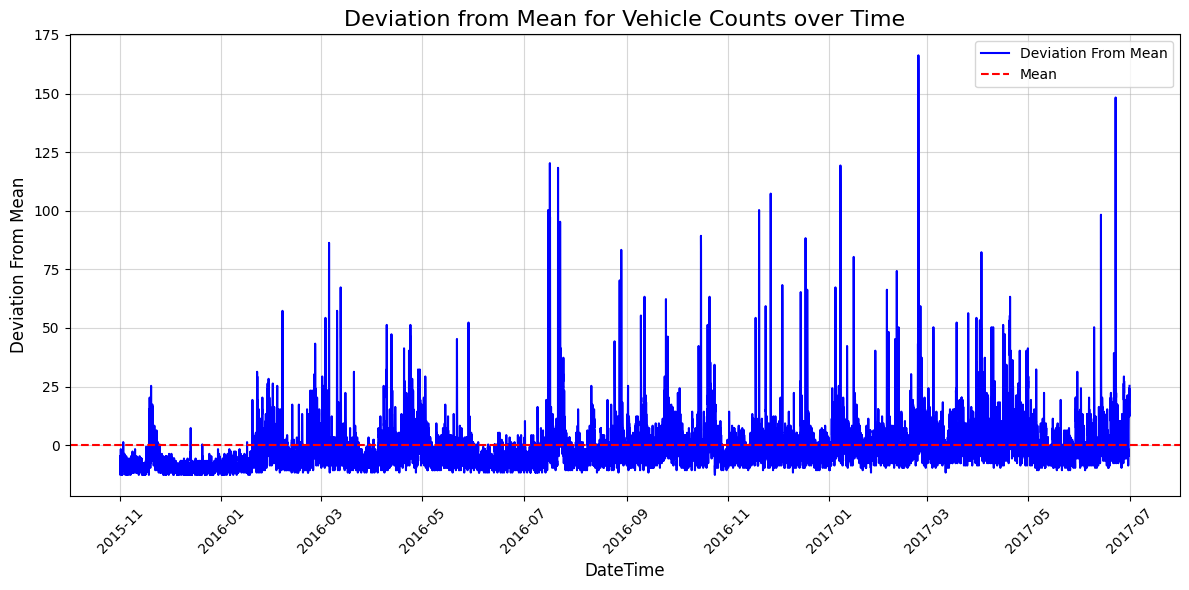

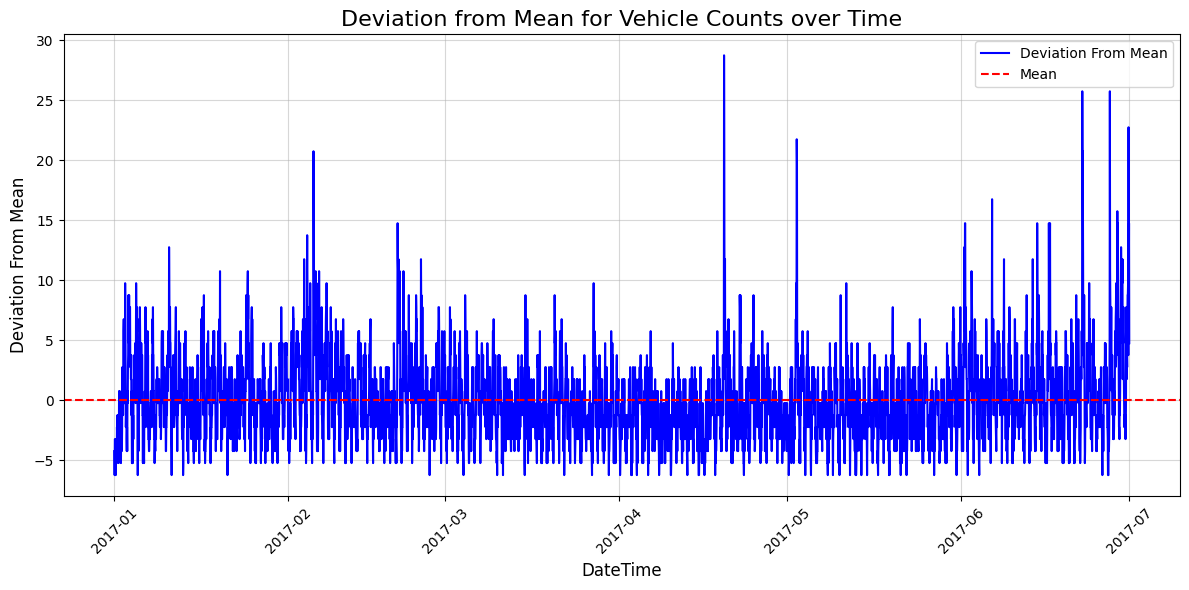

In [ ]:
import matplotlib.pyplot as plt


for j ,d in enumerate(data):
  jun1 =data[j].copy()
  mean_vehicles = jun1['Vehicles'].mean()
  std_vehicles = jun1['Vehicles'].std()

  # Calculate deviation from the mean and standard deviation (z-score)
  jun1['Deviation_From_Mean'] = jun1['Vehicles'] - mean_vehicles
  jun1['Z_Score'] = jun1['Deviation_From_Mean'] / std_vehicles

  # Display the updated dataframe with deviations
  jun1[['DateTime', 'Vehicles', 'Deviation_From_Mean', 'Z_Score']].head()
  # Plot the deviations
  plt.figure(figsize=(12, 6))

  # Plot the deviation from the mean
  plt.plot(jun1['DateTime'], jun1['Deviation_From_Mean'], label='Deviation From Mean', color='blue')

  # Highlight the 0 line (no deviation from the mean)
  plt.axhline(0, color='red', linestyle='--', label='Mean')

  plt.title('Deviation from Mean for Vehicle Counts over Time', fontsize=16)
  plt.xlabel('DateTime', fontsize=12)
  plt.ylabel('Deviation From Mean', fontsize=12)
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid(True, alpha=0.5)

  plt.tight_layout()
  plt.show()


The wider deviation from the mean implies greater variability in the data, which indeed makes it harder to predict. If traffic counts consistently move away from the average (both above and below), it indicates that the system is becoming less stable or more subject to irregular fluctuations.


In [ ]:
pip install plotly statsmodels


In [ ]:
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf
import pandas as pd

# Load your data

for j ,d in enumerate(data):

  # Calculate autocorrelation values for the 'Vehicles' column
  acf_values = acf(data[j]['Vehicles'], nlags=40)

  # Generate lags (0 to 40 for this example)
  lags = list(range(len(acf_values)))

  # Create an interactive plot using Plotly
  fig = go.Figure()

  # Add the autocorrelation values as a scatter plot
  fig.add_trace(go.Scatter(
      x=lags,
      y=acf_values,
      mode='lines+markers',
      name='Autocorrelation',
      hovertemplate='Lag: %{x}<br>Autocorrelation: %{y:.4f}<extra></extra>'
  ))

  # Add lines to label Lag 1 and Lag 2
  fig.add_trace(go.Scatter(
      x=[1], y=[acf_values[1]],
      mode='markers+text',
      text=["Lag 1"],
      textposition="top center",
      name='Lag 1',
      marker=dict(size=10, color='red')
  ))

  fig.add_trace(go.Scatter(
      x=[2], y=[acf_values[2]],
      mode='markers+text',
      text=["Lag 2"],
      textposition="top center",
      name='Lag 2',
      marker=dict(size=10, color='green')
  ))

  # Customize the layout
  fig.update_layout(
      title=f'Autocorrelation Plot with Lag Labels for Vehicle Counts -Junction-{j+1}',
      xaxis_title='Lag',
      yaxis_title='Autocorrelation',
      showlegend=False
  )

  # Show the interactive plot
  fig.show()


In [ ]:
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf, pacf

for j ,d in enumerate(data):
  # Calculate ACF and PACF for the vehicle counts
  acf_values = acf(data[j]['Vehicles'], nlags=100)
  pacf_values = pacf(data[j]['Vehicles'], nlags=100)

  # Create subplots for ACF and PACF
  fig = make_subplots(rows=1, cols=2, subplot_titles=("Autocorrelation (ACF)", "Partial Autocorrelation (PACF)"))

  # ACF plot
  fig.add_trace(go.Scatter(
    x=list(range(len(acf_values))),
    y=acf_values,
    mode='lines+markers',
    name='Autocorrelation',
    text=[f'Lag {i}' for i in range(len(acf_values))],  # Add lag labels as hover text
    hovertemplate='Lag: %{text}<br>ACF: %{y:.3f}<extra></extra>'
  ), row=1, col=1)

  # PACF plot
  fig.add_trace(go.Scatter(
    x=list(range(len(pacf_values))),
    y=pacf_values,
    mode='lines+markers',
    name='Partial Autocorrelation',
    text=[f'Lag {i}' for i in range(len(pacf_values))],  # Add lag labels as hover text
    hovertemplate='Lag: %{text}<br>PACF: %{y:.3f}<extra></extra>'
  ), row=1, col=2)

  # Customize the layout
  fig.update_layout(
    title_text=f"Interactive ACF and PACF Plot for Vehicle Counts (Junction {j+1})",
    height=500, width=1000,
    template='plotly_white',
    showlegend=False
  )

  # Show the plot
  fig.show()

ACF Patterns: All junctions show cyclical patterns in the ACF plots, indicating the presence of seasonal trends. This suggests that vehicle counts are influenced by recurring events, likely due to consistent patterns like day of the week or time of month.
PACF Patterns: The PACF plots indicate that all four junctions have a significant correlation at lag 1, meaning that vehicle counts at a given time are highly influenced by the previous time step. Subsequent lags have smaller correlations, indicating a decaying influence as the lag increases.

Seasonal Behavior: predicting cycle is exits

In [ ]:
scaled_df_copy =scaled_df.copy()
scaled_df_copy.drop(columns=['Hour'], inplace=True)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def make_metrics(models, X_test, y_test):
    """
    This function calculates R² Score and RMSE for each model in a given list of models.

    Parameters:
    - models: Dictionary of fitted regression models
    - X_test: Features for testing
    - y_test: True target values for testing

    Returns:
    - A dictionary with model names as keys and a tuple of (R² Score, RMSE) as values.
    """
    metrics = {}

    for model_name, model in models.items():
        # Predict the target values using the model
        y_pred = model.predict(X_test)

        # Calculate R² score
        r2 = r2_score(y_test, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Store the results in the dictionary
        metrics[model_name] = (r2, rmse)

    return metrics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def print_results(results,bar,features,target):
  # Prepare data for the table and the plot
  performance_data = {
      'Junction 1': results['Junction 1'],
      'Junction 2': results['Junction 2'],
      'Junction 3': results['Junction 3'],
      'Junction 4': results['Junction 4']
  }

  # Convert to DataFrame for easier handling
  df_performance = pd.DataFrame(performance_data).T.applymap(lambda x: x[0])  # Extract R² values for comparison

  # Display a table of performance metrics (R² scores and RMSE)
  df_rmse = pd.DataFrame({junc: {model: data[1] for model, data in models.items()} for junc, models in performance_data.items()})

  # Display the tables

  print('*-'*100)
  print(f"Model R² Scores Comparison: Features : {features}, Target :{target}")
  print(df_performance)

  # Display RMSE table
  print("\nModel RMSE Comparison:")
  print(df_rmse)
  print('*-'*100)
  if bar ==1:
    # Visualize the comparison of R² scores with a bar chart
    df_performance.plot(kind='bar', figsize=(10, 6), title='R² Scores Comparison Across Models and Junctions')
    plt.ylabel('R² Score')
    plt.show()

    # Visualize the comparison of RMSE with a bar chart
    df_rmse.plot(kind='bar', figsize=(10, 6), title='RMSE Comparison Across Models and Junctions')
    plt.ylabel('RMSE')
    plt.show()


In [ ]:

# Example usage with model training:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
def model_train(datafrm,features):
  # Models to be used
  models = {
      'SVR': SVR(),
      'LinearRegression': LinearRegression(),
      'RandomForestRegressor': RandomForestRegressor()
  }

  results = {}

  # Loop over each junction's data
  for junction_id, data in enumerate(datafrm):  # Assuming z_data is a list of dataframes for each junction
      # Prepare features and target variables
      X = data[features].values
      y = data['Vehicles'].values

      # Split the data into train and test sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      # Fit each model
      for model_name, model in models.items():
          model.fit(X_train, y_train)

      # Calculate metrics for each model
      junction_results = make_metrics(models, X_test, y_test)

      # Store results for the current junction
      results[f'Junction {junction_id + 1}'] = junction_results

  # Display results for all junctions
  print_results(results,0,features,'Vehicles')

In [ ]:
# Example usage with model training:--without hour
scaled_df_copy =scaled_df.copy()
#scaled_df_copy.drop(columns=['Hour'], inplace=True)
z_data = create_df(scaled_df_copy)
model_train(z_data,['Year', 'Month', 'Day'])
model_train(z_data,['Year', 'Month', 'Day','Hour'])


<ipython-input-21-e0a9816236c7>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1 -0.025456          0.476206               0.592945
Junction 2 -0.013641          0.423151               0.661608
Junction 3 -0.032807          0.088503               0.290098
Junction 4 -0.013218         -0.008328               0.111691

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.115090    0.355146    0.513875    0.181430
LinearRegression         0.796951    0.267914    0.482754    0.180991
RandomForestRegressor    0.702551    0.205199    0.426037    0.169879
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

<ipython-input-21-e0a9816236c7>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:

def add_temporal_features(df):
    # Add Day of the Week feature
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek

    # Add Is Weekend feature
    df['IsWeekend'] = df['DateTime'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

    # Add Season/Quarter feature
    df['Quarter'] = df['DateTime'].dt.quarter
    return df

In [ ]:

scaled_df_copy_1 = scaled_df.copy()
scaled_df_copy_1=add_temporal_features(scaled_df_copy_1)
z_data1 = create_df(scaled_df_copy_1)
model_train(z_data1,['Year', 'Month', 'Day','Hour','DayOfWeek'])
model_train(z_data1,['Year', 'Month', 'Day','Hour','DayOfWeek','IsWeekend'])
model_train(z_data1,['Year', 'Month', 'Day','Hour','DayOfWeek','IsWeekend','Quarter'])

<ipython-input-21-e0a9816236c7>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1  0.031288          0.703666               0.970084
Junction 2  0.048963          0.586766               0.905025
Junction 3  0.064824          0.239668               0.728158
Junction 4  0.076531          0.228172               0.510374

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.083798    0.344004    0.488984    0.173208
LinearRegression         0.599435    0.226758    0.440910    0.158350
RandomForestRegressor    0.190459    0.108710    0.263637    0.126122
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

<ipython-input-21-e0a9816236c7>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1  0.029338          0.733495               0.969655
Junction 2  0.048411          0.623734               0.905508
Junction 3  0.063110          0.240659               0.723351
Junction 4  0.073522          0.237837               0.521003

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.084889    0.344104    0.489432    0.173490
LinearRegression         0.568466    0.216378    0.440622    0.157355
RandomForestRegressor    0.191821    0.108433    0.265958    0.124745
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

<ipython-input-21-e0a9816236c7>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:

# Add lag features to the dataframe
def add_lag_features_days(df, lags=[1, 2, 3]):
    for lag in lags:
        df[f'Vehicles_Lag_{lag}'] = df['Vehicles'].shift(lag)
    df = df.dropna().reset_index(drop=True)  # Drop rows with NaN values caused by the lag
    return df
# Add lag features to the dataframe
def add_lag_features_h(df, lags=[1, 3, 6, 12, 24]):
    for lag in lags:
        df[f'Vehicles_Lag_{lag}_hours'] = df['Vehicles'].shift(lag, freq='H')
    df = df.dropna().reset_index(drop=True)  # Drop rows with NaN values caused by the lag
    return df

# Update the function to add lag features to a list of dataframes
def add_lag_features_to_list(data_list, lags=[1, 3, 6, 12, 24]):
    return [add_lag_features_h(df, lags) for df in data_list]



In [ ]:

# Add lag features to the dataframe
def add_lag_features_days(df, lags=[1, 2, 3]):
    for lag in lags:
        df[f'Vehicles_Lag_{lag}'] = df['Vehicles'].shift(lag)
    df = df.dropna().reset_index(drop=True)  # Drop rows with NaN values caused by the lag
    return df
# Add lag features to the dataframe
def add_lag_features_h(df, lags=[1, 3, 6, 12, 24]):
    df = df.set_index('DateTime')
    for lag in lags:
        df[f'Vehicles_Lag_{lag}_hours'] = df['Vehicles'].shift(lag, freq='H')
    df = df.dropna().reset_index(drop=True)  # Drop rows with NaN values caused by the lag
    return df

# Update the function to add lag features to a list of dataframes
def add_lag_features_to_list(data_list, lags):
    return [add_lag_features_h(df, lags) for df in data_list]


In [ ]:
lags=[1, 3, 6, 12, 24]
z_data_lag = add_temporal_features(scaled_df_copy)
z_data_lag = create_df(z_data_lag)
# Add temporal features
z_data_lag = add_lag_features_to_list(z_data_lag, lags)

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarnin

In [ ]:
model_train(z_data_lag,['Year', 'Month', 'Day','Hour','DayOfWeek','IsWeekend','Quarter','Vehicles_Lag_1_hours'])
model_train(z_data_lag,['Year', 'Month', 'Day','Hour','DayOfWeek','IsWeekend','Quarter','Vehicles_Lag_1_hours','Vehicles_Lag_3_hours'])
model_train(z_data_lag,['Year', 'Month', 'Day','Hour','DayOfWeek','IsWeekend','Quarter','Vehicles_Lag_1_hours','Vehicles_Lag_3_hours','Vehicles_Lag_6_hours'])
model_train(z_data_lag,['Year', 'Month', 'Day','Hour','DayOfWeek','IsWeekend','Quarter','Vehicles_Lag_1_hours','Vehicles_Lag_3_hours','Vehicles_Lag_6_hours','Vehicles_Lag_12_hours'])
model_train(z_data_lag,['Year', 'Month', 'Day','Hour','DayOfWeek','IsWeekend','Quarter','Vehicles_Lag_1_hours','Vehicles_Lag_3_hours','Vehicles_Lag_6_hours','Vehicles_Lag_12_hours','Vehicles_Lag_24_hours'])

<ipython-input-78-0a5b984dfc89>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter', 'Vehicles_Lag_1_hours'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1  0.044426          0.931540               0.965969
Junction 2  0.056772          0.851172               0.887606
Junction 3  0.069914          0.708499               0.739679
Junction 4  0.071014          0.450623               0.479570

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.057049    0.334768    0.460248    0.164224
LinearRegression         0.282932    0.132978    0.257662    0.126289
RandomForestRegressor    0.199482    0.115560    0.243492    0.122917
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

<ipython-input-78-0a5b984dfc89>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter', 'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1  0.051811          0.940534               0.967839
Junction 2  0.058530          0.854204               0.886873
Junction 3  0.070887          0.709861               0.749651
Junction 4  0.070552          0.445435               0.490485

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.052956    0.334456    0.460007    0.164264
LinearRegression         0.263692    0.131616    0.257060    0.126884
RandomForestRegressor    0.193923    0.115936    0.238783    0.121621
*-*-*-*-*-

<ipython-input-78-0a5b984dfc89>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter', 'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1  0.055289          0.943411               0.967956
Junction 2  0.059644          0.856979               0.887538
Junction 3  0.070705          0.710022               0.752094
Junction 4  0.069543          0.453557               0.486432

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.051023    0.334258    0.460053    0.164354
LinearRegression         0.257235    0.130357    0.256988    0.125952
RandomForestRegressor    0.193569    0.115595    0.23761

<ipython-input-78-0a5b984dfc89>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter', 'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours', 'Vehicles_Lag_12_hours'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1  0.056930          0.943704               0.967723
Junction 2  0.060279          0.858166               0.888327
Junction 3  0.070518          0.712368               0.766547
Junction 4  0.068720          0.455091               0.510529

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.050110    0.334145    0.460099    0.164426
LinearRegression         0.256567    0.129815    0.255946    0.125775
RandomForestRegressor    0.1942

<ipython-input-78-0a5b984dfc89>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
lags=[1, 3, 6, 12, 24,48]

z_data_lag_48 = add_temporal_features(scaled_df_copy)
z_data_lag_48 = create_df(z_data_lag_48)
# Add temporal features
z_data_lag_48 = add_lag_features_to_list(z_data_lag_48, lags)

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarnin

In [ ]:
model_train(z_data_lag_48,['Year', 'Month', 'Day','Hour','DayOfWeek','IsWeekend','Quarter','Vehicles_Lag_1_hours','Vehicles_Lag_3_hours','Vehicles_Lag_6_hours','Vehicles_Lag_12_hours','Vehicles_Lag_24_hours','Vehicles_Lag_48_hours'])

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter', 'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours', 'Vehicles_Lag_12_hours', 'Vehicles_Lag_24_hours', 'Vehicles_Lag_48_hours'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1  0.053711          0.950643               0.970556
Junction 2  0.046372          0.876625               0.899531
Junction 3  0.049718          0.752478               0.741951
Junction 4  0.086545          0.467331               0.510006

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.090224    0.349287    0.521599    0.160422
LinearRegression         0.248987    0.125634    0.

<ipython-input-78-0a5b984dfc89>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
import pandas as pd
lags=[1, 3, 6, 12, 24,48]
# Example usage with lag features
z_data_lag_rolling = add_temporal_features(scaled_df_copy)

z_data_lag_rolling['Rolling_Mean_7'] = z_data_lag_rolling['Vehicles'].rolling(window=7).mean().shift(1)

# Add Rolling Standard Deviation (7-hour window) feature
z_data_lag_rolling['Rolling_Std_7'] = z_data_lag_rolling['Vehicles'].rolling(window=7).std().shift(1)

# Add Rolling Mean and Rolling Std for a 24-hour window
z_data_lag_rolling['Rolling_Mean_24'] = z_data_lag_rolling['Vehicles'].rolling(window=24).mean().shift(1)
z_data_lag_rolling['Rolling_Std_24'] = z_data_lag_rolling['Vehicles'].rolling(window=24).std().shift(1)

z_data_lag_rolling = create_df(z_data_lag_rolling)
# Add temporal features
z_data_lag_rolling = add_lag_features_to_list(z_data_lag_rolling, lags)

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarnin

In [ ]:
model_train(z_data_lag_rolling,['Year', 'Month', 'Day','Hour','DayOfWeek','IsWeekend','Quarter','Vehicles_Lag_1_hours','Vehicles_Lag_3_hours','Vehicles_Lag_6_hours','Vehicles_Lag_12_hours','Vehicles_Lag_24_hours','Rolling_Mean_7',
    'Rolling_Std_7', 'Rolling_Mean_24', 'Rolling_Std_24'])

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter', 'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours', 'Vehicles_Lag_12_hours', 'Vehicles_Lag_24_hours', 'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_24', 'Rolling_Std_24'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1  0.057300          0.952894               0.969545
Junction 2  0.047601          0.880332               0.904283
Junction 3  0.049937          0.755052               0.751053
Junction 4  0.085238          0.469435               0.515487

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.088155    0.349061    0.521539    0.160536
Line

<ipython-input-78-0a5b984dfc89>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Define hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Results dictionary to store best models and their scores for each junction
best_models = {}
results = {}

# Loop through each junction's data
for junction_id, data in enumerate(z_data_lag_rolling):
    print(f"Performing hyperparameter tuning for Junction {junction_id + 1}...")

    # Prepare features (X) and target (y)
    features = [
        'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter',
        'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours',
        'Vehicles_Lag_12_hours', 'Vehicles_Lag_24_hours', 'Rolling_Mean_7',
        'Rolling_Std_7', 'Rolling_Mean_24', 'Rolling_Std_24'
    ]
    X = data[features].values
    y = data['Vehicles'].values

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate RandomForestRegressor
    rf = RandomForestRegressor()

    # Set up RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_grid,
        n_iter=50,  # Number of parameter settings that are sampled
        cv=3,       # Number of cross-validation folds
        verbose=2,
        n_jobs=-1,  # Use all available cores
        random_state=42
    )

    # Fit RandomizedSearchCV to the training data
    random_search.fit(X_train, y_train)

    # Get the best model from RandomizedSearchCV
    best_model = random_search.best_estimator_

    # Store the best model and parameters
    best_models[f'Junction {junction_id + 1}'] = {
        'best_params': random_search.best_params_,
        'best_model': best_model
    }

    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Calculate R² and RMSE for the best model
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the results
    results[f'Junction {junction_id + 1}'] = {
        'R²': r2,
        'RMSE': rmse
    }

# Print the best hyperparameters and scores for each junction
for junction, model_info in best_models.items():
    print(f"\n{junction}:")
    print(f"Best Hyperparameters: {model_info['best_params']}")
    print(f"R² Score: {results[junction]['R²']}")
    print(f"RMSE: {results[junction]['RMSE']}")


Performing hyperparameter tuning for Junction 1...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:

def compare_models(z_data):
    # Run model training with different feature sets
    results_without_hour = model_train(z_data, features=['Year', 'Month', 'Day'])
    results_with_hour = model_train(z_data, features=['Year', 'Month', 'Day', 'Hour'])
    results_with_lag_and_rolling = model_train(z_data, features=[
        'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter',
        'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours',
        'Vehicles_Lag_12_hours', 'Vehicles_Lag_24_hours',
        'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_24', 'Rolling_Std_24'
    ])


import pandas as pd
lags=[1, 3, 6, 12, 24,48]
# Example usage with lag features
z_data_lag_pred = add_temporal_features(scaled_df_copy)

z_data_lag_pred['Rolling_Mean_7'] = z_data_lag_pred['Vehicles'].rolling(window=7).mean().shift(1)

# Add Rolling Standard Deviation (7-hour window) feature
z_data_lag_pred['Rolling_Std_7'] = z_data_lag_pred['Vehicles'].rolling(window=7).std().shift(1)

# Add Rolling Mean and Rolling Std for a 24-hour window
z_data_lag_pred['Rolling_Mean_24'] = z_data_lag_pred['Vehicles'].rolling(window=24).mean().shift(1)
z_data_lag_pred['Rolling_Std_24'] = z_data_lag_pred['Vehicles'].rolling(window=24).std().shift(1)

z_data_lag_pred = create_df(z_data_lag_pred)
# Add temporal features
z_data_lag_pred = add_lag_features_to_list(z_data_lag_pred, lags)  # Add lag features


# Compare models
compare_models(z_data_lag_pred)

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-33-dc08ebbc4104>:11: FutureWarnin

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1 -0.032656          0.503423               0.628946
Junction 2 -0.021111          0.442554               0.674980
Junction 3 -0.035709          0.111138               0.323142
Junction 4 -0.006733         -0.000368               0.108805

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.138890    0.361434    0.544540    0.168413
LinearRegression         0.789764    0.267051    0.504461    0.167880
RandomForestRegressor    0.682688    0.203914    0.440210    0.158455
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

<ipython-input-21-e0a9816236c7>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Model R² Scores Comparison: Features : ['Year', 'Month', 'Day', 'Hour'], Target :Vehicles
                 SVR  LinearRegression  RandomForestRegressor
Junction 1  0.021427          0.641059               0.947799
Junction 2  0.031957          0.522833               0.858261
Junction 3  0.050399          0.233882               0.743734
Junction 4  0.102300          0.213120               0.476613

Model RMSE Comparison:
                       Junction 1  Junction 2  Junction 3  Junction 4
SVR                      1.108666    0.351917    0.521412    0.159032
LinearRegression         0.671453    0.247074    0.468337    0.148893
RandomForestRegressor    0.256062    0.134659    0.270867    0.121431
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

<ipython-input-21-e0a9816236c7>:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:

def generate_future_data(historical_df, periods, freq='h'):
    # Find the last date in the historical data
    start_date = historical_df['DateTime'].max() + pd.Timedelta(hours=1)
    date_range = pd.date_range(start=start_date, periods=periods, freq=freq)
    future_df = pd.DataFrame({'DateTime': date_range})

    # Extract features from the datetime column
    future_df['Year'] = future_df['DateTime'].dt.year
    future_df['Month'] = future_df['DateTime'].dt.month
    future_df['Day'] = future_df['DateTime'].dt.day
    future_df['Hour'] = future_df['DateTime'].dt.hour
    future_df['DayOfWeek'] = future_df['DateTime'].dt.dayofweek
    future_df['IsWeekend'] = future_df['DayOfWeek'].map(lambda x: 1 if x >= 5 else 0)
    future_df['Quarter'] = future_df['DateTime'].dt.quarter
    for lag in [1, 3, 6, 12, 24]:
        future_df[f'Vehicles_Lag_{lag}_hours'] = historical_df['Vehicles'].iloc[-lag]

    for window in [7, 24]:
        future_df[f'Rolling_Mean_{window}'] = historical_df['Vehicles'].rolling(window=window).mean().iloc[-1]
        future_df[f'Rolling_Std_{window}'] = historical_df['Vehicles'].rolling(window=window).std().iloc[-1]

    return future_df

# Generate future data for prediction
future_data = generate_future_data(scaled_df_copy, periods=24 * 60)


In [ ]:
future_data

DateTime  Year  Month  Day  Hour  DayOfWeek  IsWeekend  \
0    2017-07-01 00:00:00  2017      7    1     0          5          1   
1    2017-07-01 01:00:00  2017      7    1     1          5          1   
2    2017-07-01 02:00:00  2017      7    1     2          5          1   
3    2017-07-01 03:00:00  2017      7    1     3          5          1   
4    2017-07-01 04:00:00  2017      7    1     4          5          1   
...                  ...   ...    ...  ...   ...        ...        ...   
1435 2017-08-29 19:00:00  2017      8   29    19          1          0   
1436 2017-08-29 20:00:00  2017      8   29    20          1          0   
1437 2017-08-29 21:00:00  2017      8   29    21          1          0   
1438 2017-08-29 22:00:00  2017      8   29    22          1          0   
1439 2017-08-29 23:00:00  2017      8   29    23          1          0   

      Quarter  Vehicles_Lag_1_hours  Vehicles_Lag_3_hours  \
0           3             -0.520068             -0.327296   
1           3             -0.520068             -0.327296   
2           3             -0.520068             -0.327296   
3           3             -0.520068             -0.327296   
4           3             -0.520068             -0.327296   
...       ...                   ...                   ...   
1435        3             -0.520068             -0.327296   
1436        3             -0.520068             -0.327296   
1437        3             -0.520068             -0.327296   
1438        3             -0.520068             -0.327296   
1439        3             -0.520068             -0.327296   

      Vehicles_Lag_6_hours  Vehicles_Lag_12_hours  Vehicles_Lag_24_hours  \
0                -0.279103              -0.664648              -0.664648   
1                -0.279103              -0.664648              -0.664648   
2                -0.279103              -0.664648              -0.664648   
3                -0.279103              -0.664648              -0.664648   
4                -0.279103              -0.664648              -0.664648   
...                    ...                    ...                    ...   
1435             -0.279103              -0.664648              -0.664648   
1436             -0.279103              -0.664648              -0.664648   
1437             -0.279103              -0.664648              -0.664648   
1438             -0.279103              -0.664648              -0.664648   
1439             -0.279103              -0.664648              -0.664648   

      Rolling_Mean_7  Rolling_Std_7  Rolling_Mean_24  Rolling_Std_24  
0          -0.244679       0.313211        -0.552197        0.303028  
1          -0.244679       0.313211        -0.552197        0.303028  
2          -0.244679       0.313211        -0.552197        0.303028  
3          -0.244679       0.313211        -0.552197        0.303028  
4          -0.244679       0.313211        -0.552197        0.303028  
...              ...            ...              ...             ...  
1435       -0.244679       0.313211        -0.552197        0.303028  
1436       -0.244679       0.313211        -0.552197        0.303028  
1437       -0.244679       0.313211        -0.552197        0.303028  
1438       -0.244679       0.313211        -0.552197        0.303028  
1439       -0.244679       0.313211        -0.552197        0.303028  

[1440 rows x 17 columns]

In [ ]:

def predict_future_traffic(models, future_data, features):
    predictions = {}
    for model_name, model in models.items():
        X_future = future_data[features].values
        predictions[model_name] = model.predict(X_future)
    return predictions


# Train the final model using the best features and predict future traffic for all junctions



future_predictions_all_junctions = {}
for junction_id, data in enumerate(z_data_lag_pred):
    if junction_id == 0:
        best_features = [
    'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend',
    'Vehicles_Lag_1_hours',
    'Vehicles_Lag_12_hours', 'Vehicles_Lag_24_hours', 'Rolling_Std_7', 'Rolling_Std_24'
    ]#according to correlation removed features for jun-1
    elif junction_id == 1:
      best_features = [
    'Year', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter',
    'Vehicles_Lag_1_hours',
    'Vehicles_Lag_12_hours', 'Vehicles_Lag_24_hours',
    'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Std_24'
    ]
    elif junction_id == 2:
      best_features = [
    'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend',
    'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours',
    'Vehicles_Lag_12_hours', 'Vehicles_Lag_24_hours',
    'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_24', 'Rolling_Std_24'
    ]
    elif junction_id == 3:
      best_features = [
    'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter',
    'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours',
    'Vehicles_Lag_12_hours', 'Vehicles_Lag_24_hours',
    'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_24', 'Rolling_Std_24'
]

    final_model = RandomForestRegressor()
    final_model.fit(data[best_features].values, data['Vehicles'].values)
    future_predictions = predict_future_traffic({'RandomForestRegressor': final_model}, future_data, best_features)
    future_predictions_all_junctions[f'Junction {junction_id + 1}'] = future_predictions['RandomForestRegressor']

print("Future Predictions for All Junctions:", future_predictions_all_junctions)


Future Predictions for All Junctions: {'Junction 1': array([-0.47958591, -0.47958591, -0.49163419, ..., -0.34127163,
       -0.34127163, -0.34127163]), 'Junction 2': array([-0.4824775 , -0.48199556, -0.51814041, ..., -0.45645321,
       -0.46271831, -0.46850149]), 'Junction 3': array([-0.56922512, -0.65452696, -0.70464781, ..., -0.42464574,
       -0.43332051, -0.42946506]), 'Junction 4': array([-0.57693602, -0.64103288, -0.73356369, ..., -0.45500741,
       -0.45500741, -0.47428466])}


In [ ]:
future_predictions_all_junctions.t

{'Junction 1': array([-0.50030895, -0.50127281, -0.52633324, ..., -0.36681399,
        -0.36681399, -0.36681399]),
 'Junction 2': array([-0.49548964, -0.49597157, -0.53934538, ..., -0.44777844,
        -0.44777844, -0.44729651]),
 'Junction 3': array([-0.57308057, -0.64729799, -0.69018987, ..., -0.44874231,
        -0.45548934, -0.45934479]),
 'Junction 4': array([-0.5672974 , -0.60536997, -0.72488892, ..., -0.43187471,
        -0.43139278, -0.45307969])}

In [ ]:

def visualize_predictions(predictions, future_data):
    # Generate the timestamps for the future predictions
    timestamps = future_data['DateTime']

    # Plot future predictions for each junction
    plt.figure(figsize=(15, 10))

    for junction, predicted_values in predictions.items():
        plt.plot(timestamps, predicted_values, label=f'{junction} Predictions')

    plt.xlabel('Time')
    plt.ylabel('Predicted Vehicle Count')
    plt.title('Future Traffic Predictions for All Junctions')
    plt.legend()
    plt.grid(True)
    plt.show()

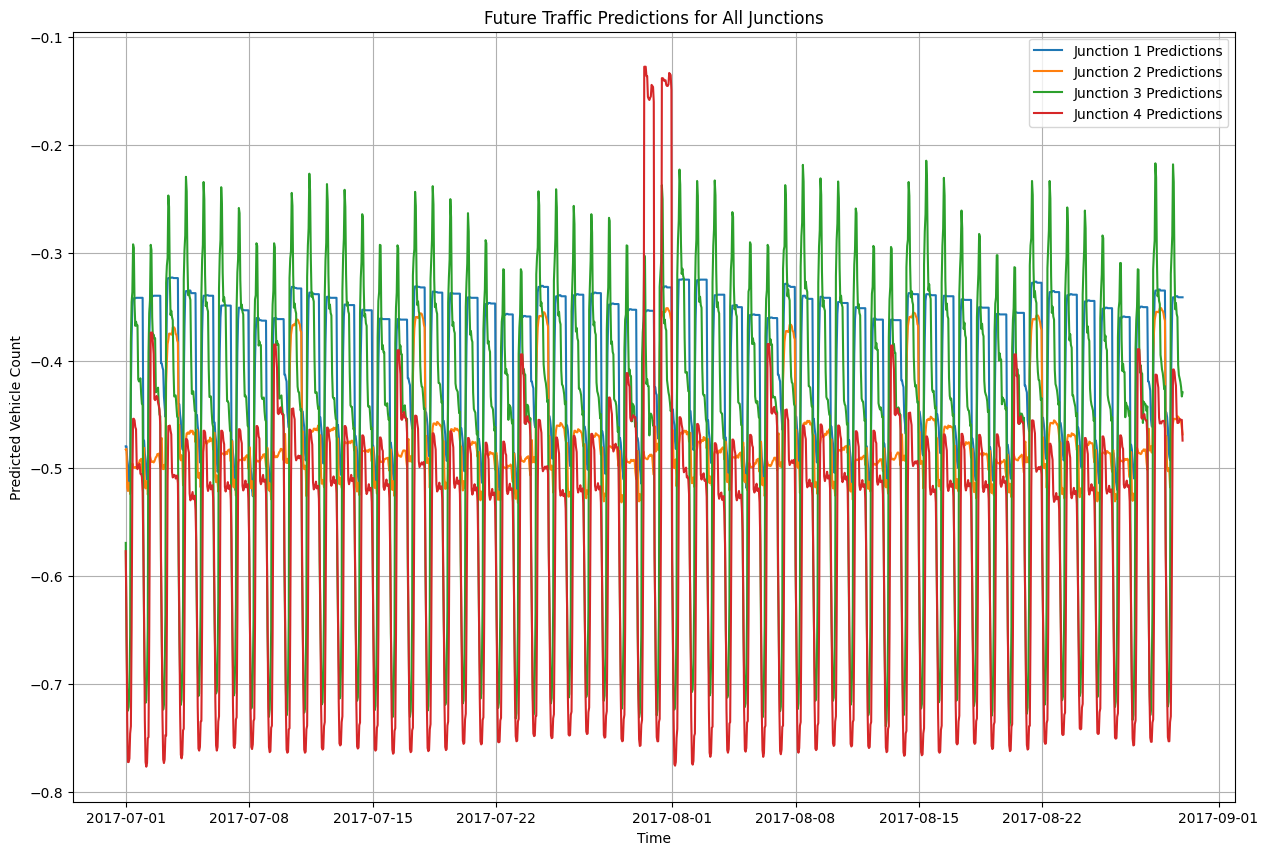

In [ ]:
# Visualize future predictions
visualize_predictions(future_predictions_all_junctions, future_data)

In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions_separately(predictions, future_data):
    # Generate the timestamps for the future predictions
    timestamps = future_data['DateTime']

    # Loop over each junction and plot individually
    for junction, predicted_values in predictions.items():
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, predicted_values, label=f'{junction} Predictions', color='b')

        # Adding labels, title, legend, and grid
        plt.xlabel('Time')
        plt.ylabel('Predicted Vehicle Count')
        plt.title(f'Future Traffic Predictions for {junction}')
        plt.legend()
        plt.grid(True)
        plt.show()


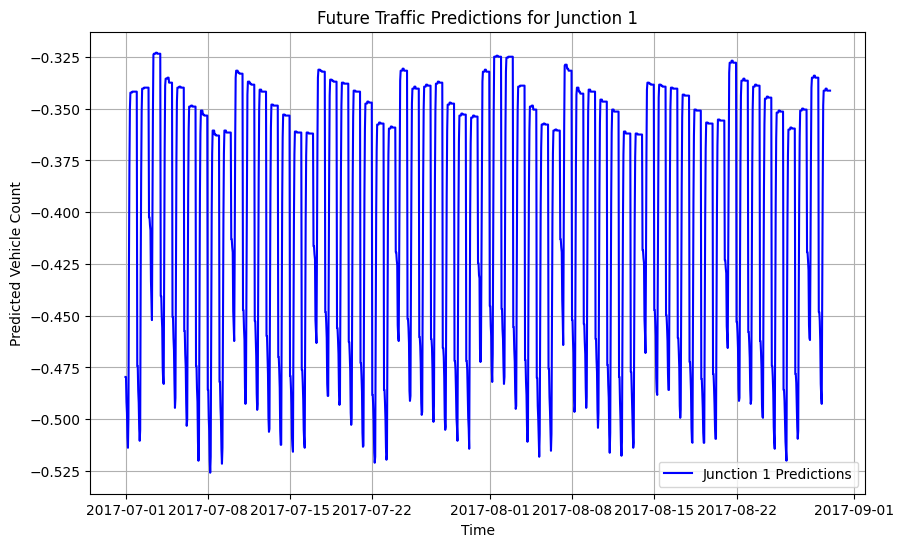

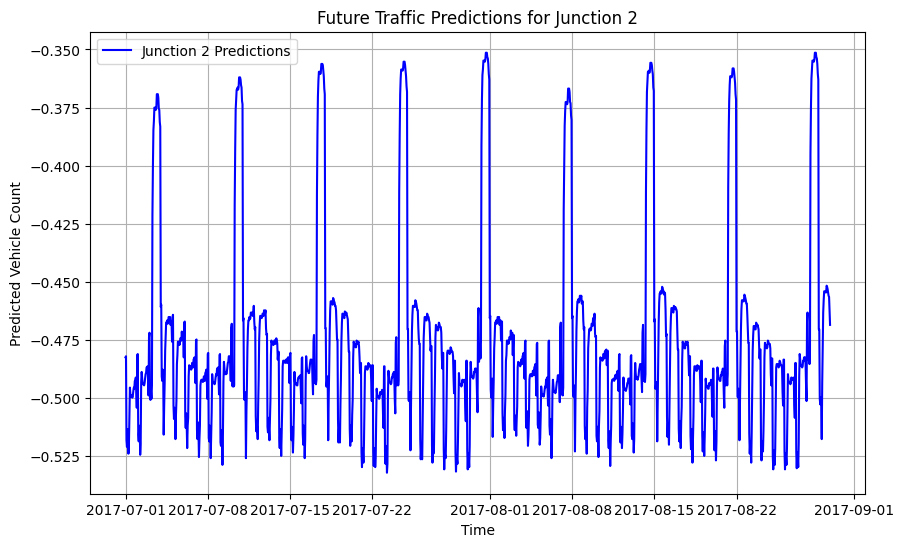

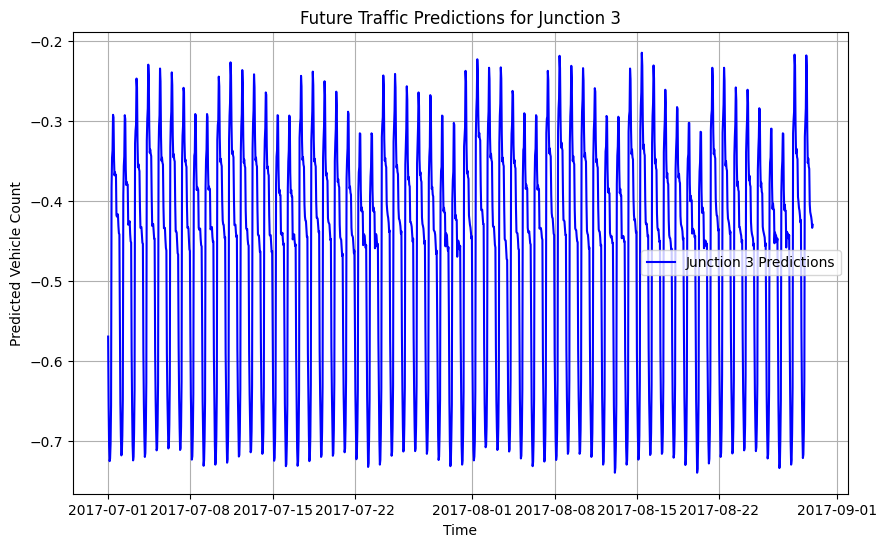

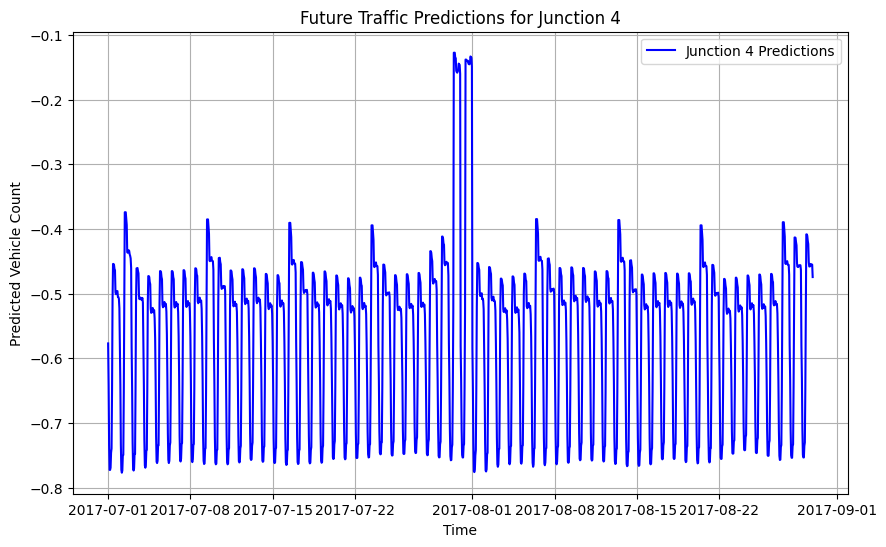

In [ ]:
visualize_predictions_separately(future_predictions_all_junctions, future_data)

In [ ]:
# Calculate statistics for each junction
junction_stats = df.groupby('Junction')['Vehicles'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Print the statistics for each junction
print(junction_stats)


   Junction       mean        std  min  max
0         1  45.052906  23.008345    5  156
1         2  14.253221   7.401307    1   48
2         3  13.694010  10.436005    1  180
3         4   7.251611   3.521455    1   36


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

junction_stats = df.groupby('Junction')['Vehicles'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Helper function to get the scaling parameters for a specific junction
def get_junction_stats(junction_number, junction_stats):
    stats = junction_stats[junction_stats['Junction'] == junction_number]
    mean = stats['mean'].values[0]
    std = stats['std'].values[0]
    min_val = stats['min'].values[0]
    max_val = stats['max'].values[0]
    return mean, std, min_val, max_val

# Functions to reverse normalization
def reverse_standardization(predictions, mean, std):
    return [(value * std) + mean for value in predictions]

def reverse_min_max_scaling(predictions, min_val, max_val):
    return [(value * (max_val - min_val)) + min_val for value in predictions]

# Step 2: Visualization function that handles separate statistics per junction
def visualize_predictions_absolute(predictions, future_data, junction_stats, method='z-score'):
    timestamps = future_data['DateTime']

    for junction, normalized_values in predictions.items():
        # Get scaling parameters for the current junction
        junction_number = int(junction.split()[-1])  # Assumes junction names like "Junction 1"
        mean, std, min_val, max_val = get_junction_stats(junction_number, junction_stats)

        # Convert normalized values to absolute values
        if method == 'z-score':
            absolute_values = reverse_standardization(normalized_values, mean, std)
        elif method == 'min-max':
            absolute_values = reverse_min_max_scaling(normalized_values, min_val, max_val)
        else:
            raise ValueError("Unknown method. Use 'z-score' or 'min-max'.")

        # Plot the absolute predictions
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, absolute_values, label=f'{junction} Absolute Predictions', color='b')

        # Adding labels, title, legend, and grid
        plt.xlabel('Time')
        plt.ylabel('Predicted Vehicle Count')
        plt.title(f'Future Traffic Predictions for {junction} (Absolute Values)')
        plt.legend()
        plt.grid(True)
        plt.show()



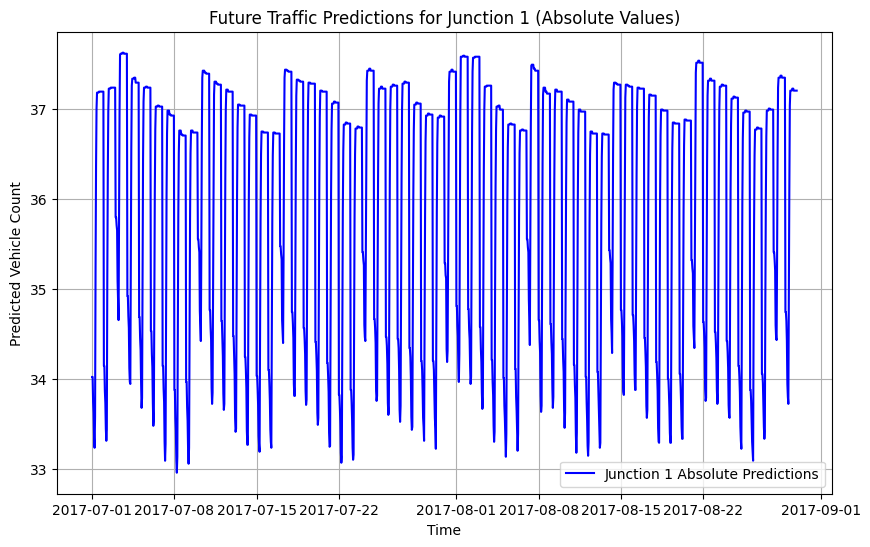

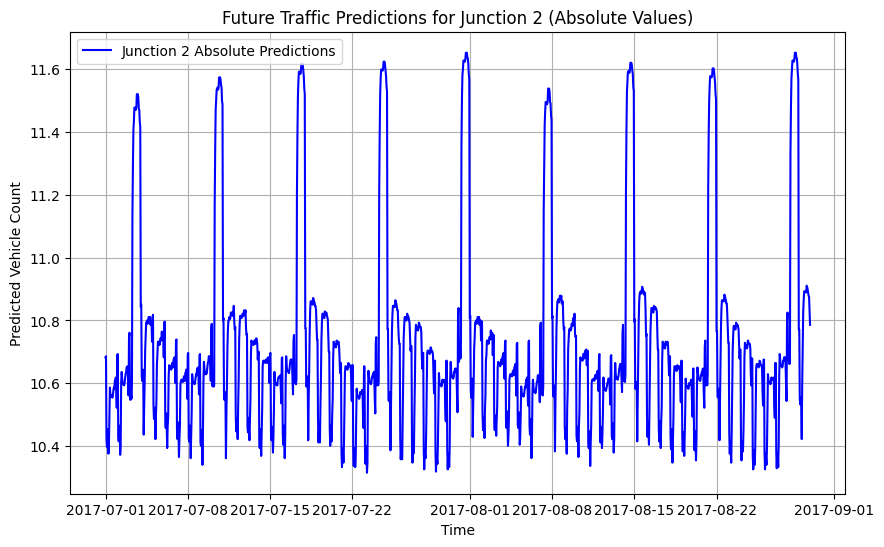

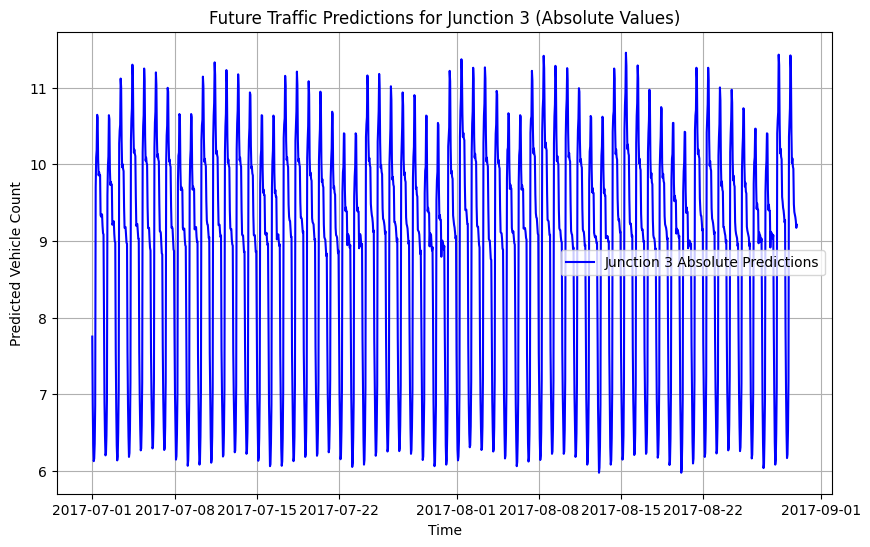

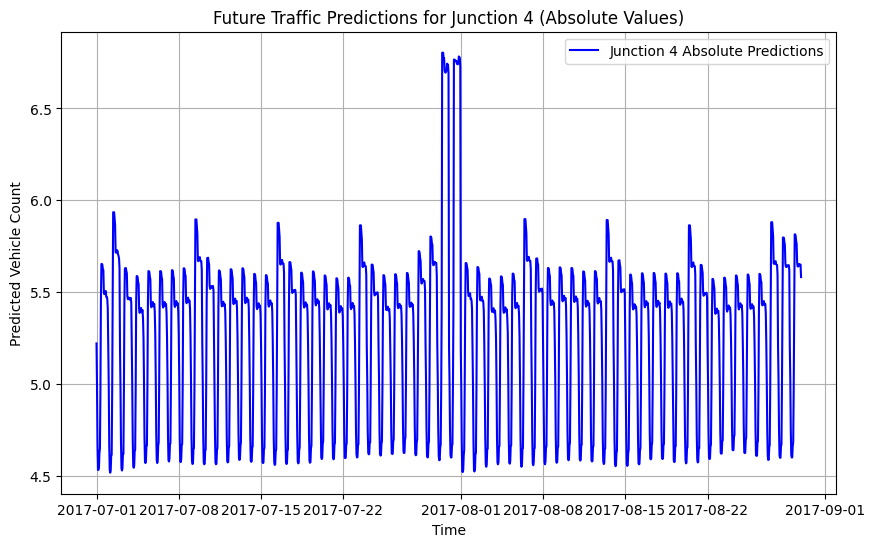

In [ ]:

visualize_predictions_absolute(future_predictions_all_junctions, future_data, junction_stats, method='z-score')

Junction 1
Predicted Vehicle Counts: Range from around 33 to 37 vehicles.
Pattern: nearly consistent and showing seasonal pattern

Junction 2
Predicted Vehicle Counts: Range between approximately 10.4 and 11.6 vehicles.
Pattern: sudden hikes and drops might be due to peak hours but having variability

Junction 3
Predicted Vehicle Counts: Range from about 6 to 11 vehicles.
Pattern: The range shows more variation than Junction 1 but less than Junction 2, with relatively frequent peaks and troughs.

Junction 4
Predicted Vehicle Counts: Range from 4.5 to around 6.5 vehicles, with som rare hikes.
Pattern: This junction has the lowest vehicle counts overall are consistent traffic compare to all junctions

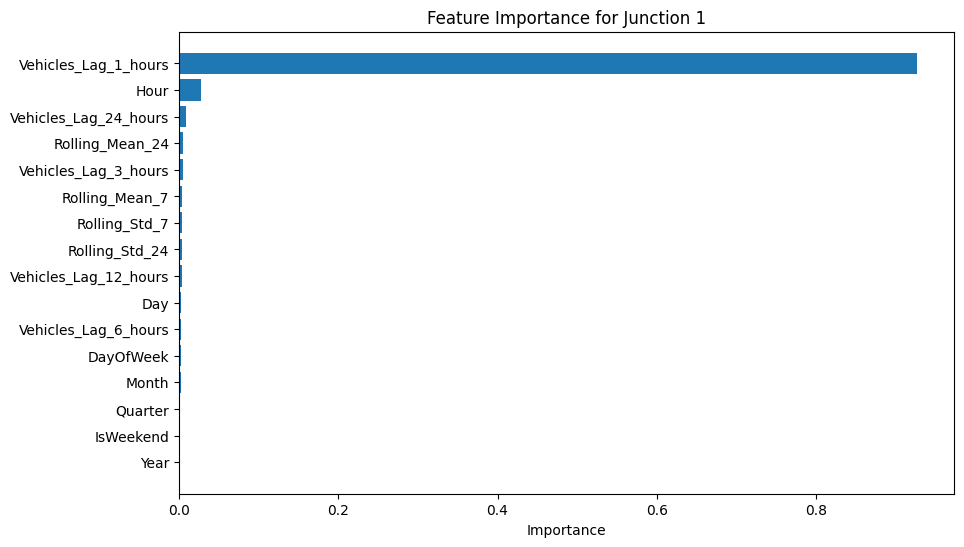

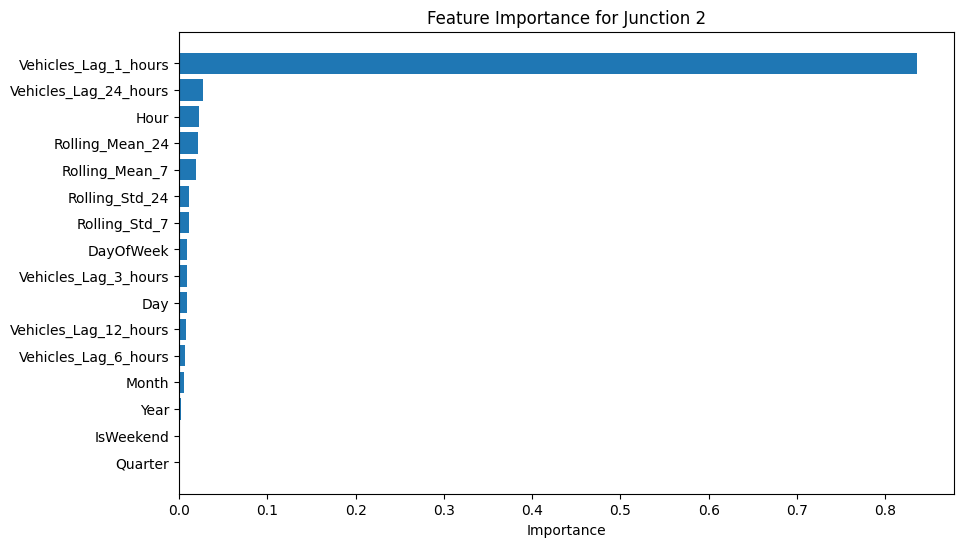

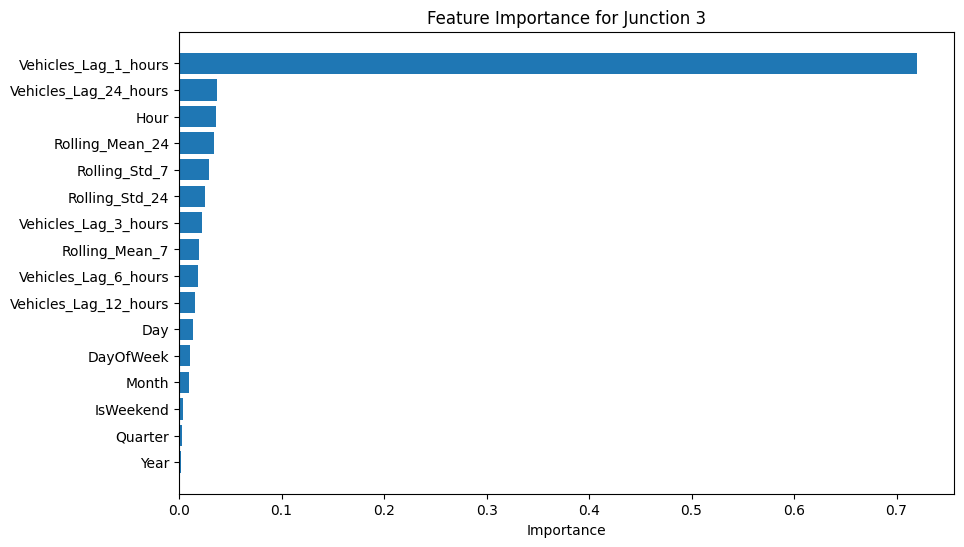

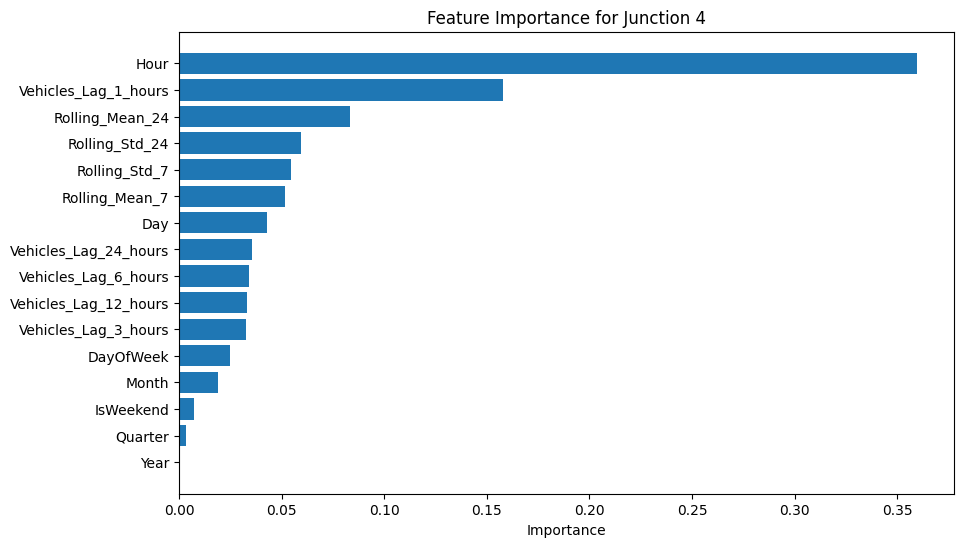

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

for junction_id, data in enumerate(z_data_lag_rolling):
    # Extract features and target
    X = data[[
        'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'Quarter',
        'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours',
        'Vehicles_Lag_12_hours', 'Vehicles_Lag_24_hours', 'Rolling_Mean_7',
        'Rolling_Std_7', 'Rolling_Mean_24', 'Rolling_Std_24'
    ]]
    y = data['Vehicles']

    # Train a Random Forest Regressor to get feature importances
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Get feature importance
    feature_importance = model.feature_importances_

    # Create a DataFrame for better visualization
    feature_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_df['Feature'], feature_df['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Feature Importance for Junction {junction_id + 1}')
    plt.gca().invert_yaxis()
    plt.show()


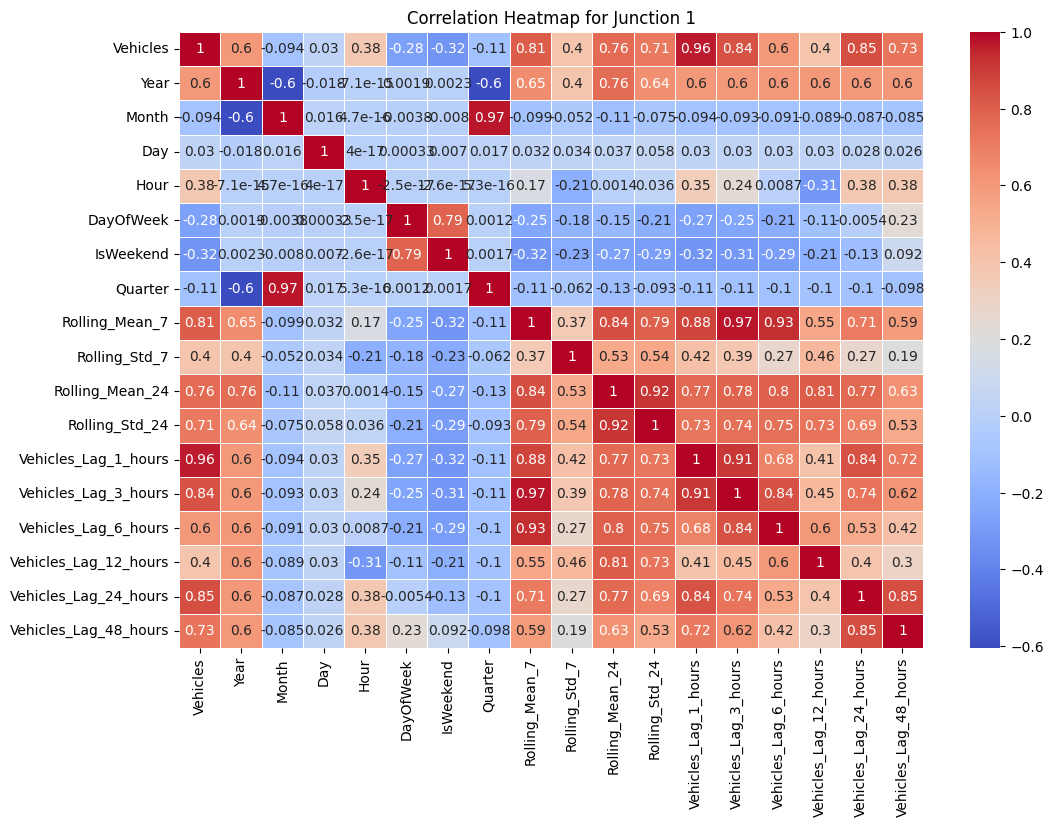

High Correlation Pairs for Junction 1:
[('Vehicles', 'Vehicles_Lag_1_hours'), ('Month', 'Quarter'), ('Quarter', 'Month'), ('Rolling_Mean_7', 'Vehicles_Lag_3_hours'), ('Rolling_Mean_7', 'Vehicles_Lag_6_hours'), ('Rolling_Mean_24', 'Rolling_Std_24'), ('Rolling_Std_24', 'Rolling_Mean_24'), ('Vehicles_Lag_1_hours', 'Vehicles'), ('Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours'), ('Vehicles_Lag_3_hours', 'Rolling_Mean_7'), ('Vehicles_Lag_3_hours', 'Vehicles_Lag_1_hours'), ('Vehicles_Lag_6_hours', 'Rolling_Mean_7')]
feature to drop  {'Vehicles_Lag_6_hours', 'Vehicles_Lag_1_hours', 'Vehicles_Lag_3_hours', 'Quarter', 'Rolling_Std_24'}


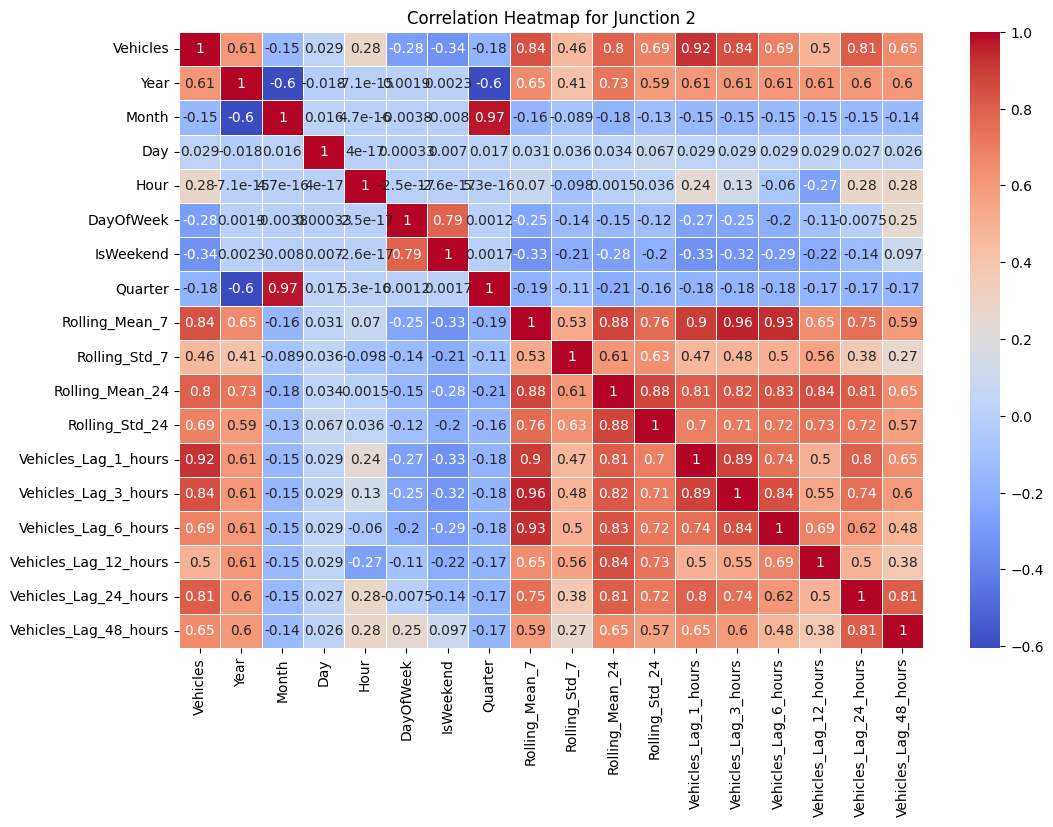

High Correlation Pairs for Junction 2:
[('Vehicles', 'Vehicles_Lag_1_hours'), ('Month', 'Quarter'), ('Quarter', 'Month'), ('Rolling_Mean_7', 'Vehicles_Lag_3_hours'), ('Rolling_Mean_7', 'Vehicles_Lag_6_hours'), ('Vehicles_Lag_1_hours', 'Vehicles'), ('Vehicles_Lag_3_hours', 'Rolling_Mean_7'), ('Vehicles_Lag_6_hours', 'Rolling_Mean_7')]
feature to drop  {'Vehicles_Lag_3_hours', 'Vehicles_Lag_6_hours', 'Vehicles_Lag_1_hours', 'Quarter'}


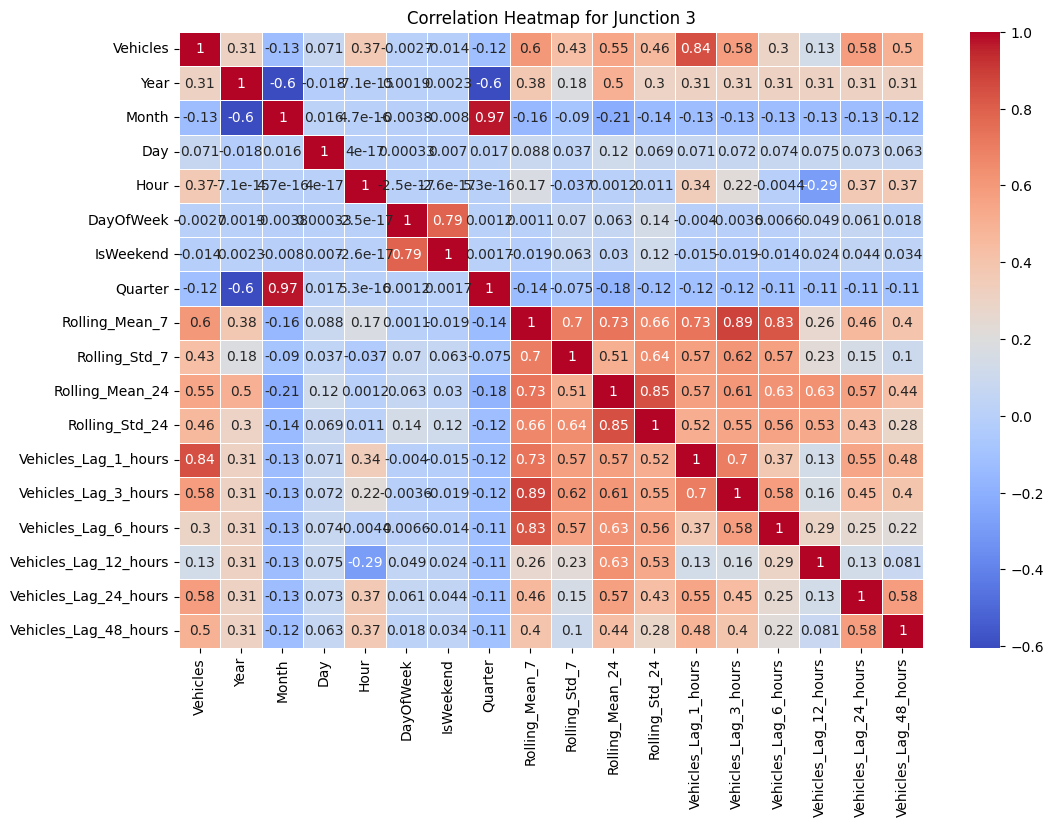

High Correlation Pairs for Junction 3:
[('Month', 'Quarter'), ('Quarter', 'Month')]
feature to drop  {'Quarter'}


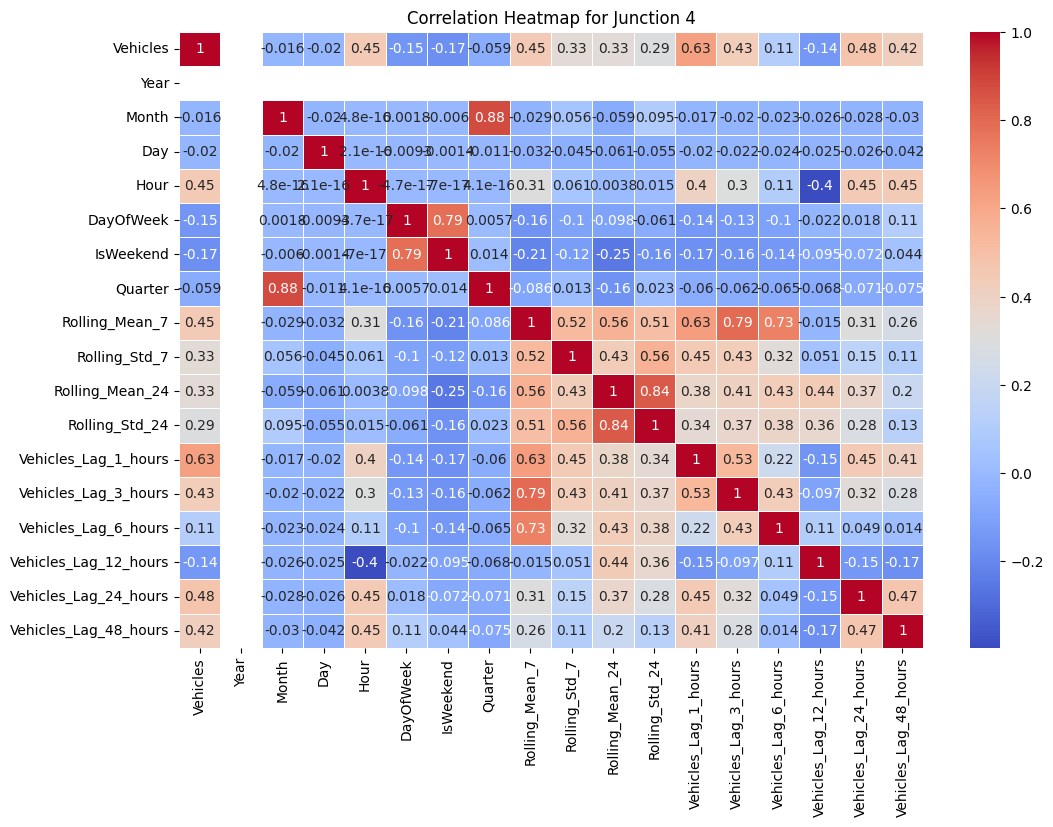

High Correlation Pairs for Junction 4:
[]
feature to drop  set()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'z_data_lag_rolling' is the list of dataframes for each junction
for junction_id, data in enumerate(z_data_lag_rolling):
    # Calculate correlation matrix
    correlation_matrix = data.corr()

    # Plot heatmap of correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for Junction {junction_id + 1}')
    plt.show()
    # Identify features with high correlation (e.g., > 0.8)
    high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.9]
    features_to_drop = set()
    for col1, col2 in high_corr_pairs:
      if col1 not in features_to_drop and col2 not in features_to_drop:
        features_to_drop.add(col2)
    # Print pairs with high correlation
    print(f'High Correlation Pairs for Junction {junction_id + 1}:')
    print(high_corr_pairs)
    print('feature to drop ',features_to_drop)
